# <span style="color:green;">**Credit Scoring Model**</span>

### <span style="color:blue;">Talha Qayyum</span>
### <span style="color:blue;">Credit Risk - Data Scientist</span>
<a href="https://www.linkedin.com/in/talhaqayyum/" style="font-size: 20px;">LinkedIn: Talha Qayyum</a>

In this Assignment, we will focus on some of the steps involved in credit modeling. We will cover the entire model development process in 6 parts.

### **Section 1: Exploratory Data Analysis (EDA)**

EDA.ipynb notebook serves the data analysis

- **Data Audit**
- **Distribution of Through-the-door Applications**
- **Trend of Loan Ticket Size Distribution**
- **Distribution of Applications per Segment**

---

### **Section 2: Data Preparation**

- **Null Tracking**
- **Feature Engineering**
- **Data Splitting**

---

### **Section 3: Fine Classing Coarse Classing and Feature Selection**

- **WoE and IV Calculations**
- **Feature Selection**
- **WoE Transformation**

---

### **Section 4: Model Development**

- **Setting up Scorecard Object**
- **Characteristics Analysis Report**
- **Save Model**

---

### **Section 5: Model Evaluation**

- **Scorecard and Credit Score Distribution**
- **Model Profile**
- **Model Intrpretablity**
---

### **Section 6: Scorecard Profile Creation**

- **Model Loader**
- **Scorecard Profile**
- **Final Credit Report**


---

In [364]:
#import Optimal Binning, and the sklearn libraries we need for this process
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from optbinning import OptimalBinning  #you may need to "pip install optbinning" if you don't already have this library
from optbinning import Scorecard
from optbinning.scorecard import ScorecardMonitoring
from optbinning import BinningProcess
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import brier_score_loss
import category_encoders as ce  # TargetEncoder
import matplotlib.pyplot as plt

In [365]:
%run utils.ipynb

In [366]:
dfs = pd.read_excel('/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/data/Processed/processed_credit_data.xlsx')
display(dfs.head())
display(dfs.info())
display(dfs.describe())


,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,other_debtors,...,installment_plan,housing,existing_credits,default,dependents,foreign_worker,job,gender,employment_length_years,residence_history_years
0,0,-43.000000,6,critical,radio/tv,1169,781.570379,4,single,none,...,none,own,2,0,1,yes,skilled employee,male,13.0,6.000000
1,1,75.000000,48,repaid,radio/tv,5951,89.000000,2,Unknown,none,...,none,own,1,1,1,yes,skilled employee,female,2.0,0.416667
2,2,97.245875,12,critical,education,2096,24.000000,2,single,none,...,none,own,1,0,2,yes,unskilled resident,male,5.0,4.000000
3,3,-32.000000,42,repaid,furniture,7882,9.000000,2,single,guarantor,...,none,for free,1,0,2,yes,skilled employee,male,5.0,13.000000
4,4,-23.000000,24,delayed,car (new),4870,43.000000,3,single,none,...,none,for free,2,1,2,yes,skilled employee,male,3.0,13.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   checking_balance         1000 non-null   float64
 2   months_loan_duration     1000 non-null   int64  
 3   credit_history           1000 non-null   object 
 4   purpose                  1000 non-null   object 
 5   amount                   1000 non-null   int64  
 6   savings_balance          1000 non-null   float64
 7   installment_rate         1000 non-null   int64  
 8   personal_status          1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  property                 1000 non-null   object 
 11  age                      1000 non-null   int64  
 12  installment_plan         1000 non-null   object 
 13  housing                  1000 non-null   object 
 14  existing_credits         

None

,Unnamed: 0,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,age,existing_credits,default,dependents,employment_length_years,residence_history_years
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,97.245875,20.903000,3271.258000,781.570379,2.973000,35.546000,1.407000,0.300000,1.155000,5.129583,7.085833
std,288.819436,161.029310,12.058814,2822.736876,2726.687149,1.118715,11.375469,0.577654,0.458487,0.362086,5.151840,7.473123
min,0.000000,-50.000000,4.000000,250.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,249.750000,-5.250000,12.000000,1365.500000,38.000000,2.000000,27.000000,1.000000,0.000000,1.000000,1.000000,0.750000
50%,499.500000,97.245875,18.000000,2319.500000,82.500000,3.000000,33.000000,1.000000,0.000000,1.000000,3.000000,4.000000
75%,749.250000,97.245875,24.000000,3972.250000,781.570379,4.000000,42.000000,2.000000,1.000000,1.000000,7.000000,13.000000
max,999.000000,999.000000,72.000000,18424.000000,19972.000000,4.000000,75.000000,4.000000,1.000000,2.000000,19.000000,24.000000


In [367]:
dfs.head()

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,other_debtors,...,installment_plan,housing,existing_credits,default,dependents,foreign_worker,job,gender,employment_length_years,residence_history_years
0,0,-43.000000,6,critical,radio/tv,1169,781.570379,4,single,none,...,none,own,2,0,1,yes,skilled employee,male,13.0,6.000000
1,1,75.000000,48,repaid,radio/tv,5951,89.000000,2,Unknown,none,...,none,own,1,1,1,yes,skilled employee,female,2.0,0.416667
2,2,97.245875,12,critical,education,2096,24.000000,2,single,none,...,none,own,1,0,2,yes,unskilled resident,male,5.0,4.000000
3,3,-32.000000,42,repaid,furniture,7882,9.000000,2,single,guarantor,...,none,for free,1,0,2,yes,skilled employee,male,5.0,13.000000
4,4,-23.000000,24,delayed,car (new),4870,43.000000,3,single,none,...,none,for free,2,1,2,yes,skilled employee,male,3.0,13.000000


In [368]:
dfs.drop(columns=['Unnamed: 0'], inplace=True)
print("Dataset shape:", dfs.shape)
dfs.head()

Dataset shape: (1000, 21)


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,other_debtors,property,...,installment_plan,housing,existing_credits,default,dependents,foreign_worker,job,gender,employment_length_years,residence_history_years
0,-43.000000,6,critical,radio/tv,1169,781.570379,4,single,none,real estate,...,none,own,2,0,1,yes,skilled employee,male,13.0,6.000000
1,75.000000,48,repaid,radio/tv,5951,89.000000,2,Unknown,none,real estate,...,none,own,1,1,1,yes,skilled employee,female,2.0,0.416667
2,97.245875,12,critical,education,2096,24.000000,2,single,none,real estate,...,none,own,1,0,2,yes,unskilled resident,male,5.0,4.000000
3,-32.000000,42,repaid,furniture,7882,9.000000,2,single,guarantor,building society savings,...,none,for free,1,0,2,yes,skilled employee,male,5.0,13.000000
4,-23.000000,24,delayed,car (new),4870,43.000000,3,single,none,unknown/none,...,none,for free,2,1,2,yes,skilled employee,male,3.0,13.000000


In [369]:
df = dfs.copy()


## <span style="color:green;">**Section 1: Data Preparation**</span>

### <span style="color:darkorange;">Null Tracking</span>
- Confirm if there are any nulls in the dataset

### <span style="color:darkorange;">Feature Engineering</span>

- Device some new features with given feature set to improve model strength

### <span style="color:darkorange;">Data Splitting</span>

- Split the data into **training** and **testing** datasets.





In [370]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'installment_rate', 'personal_status',
       'other_debtors', 'property', 'age', 'installment_plan', 'housing',
       'existing_credits', 'default', 'dependents', 'foreign_worker', 'job',
       'gender', 'employment_length_years', 'residence_history_years'],
      dtype='object')

### <span style="color:blue;">**Null Tracking**</span>

In [371]:
missing_zero_values_table(df)

Your selected dataframe has 21 columns and 1000 Rows.
There are 21 columns that have missing values.


,No of 0s,% of 0s,No of Missing Values,% of Missing Values,Rows,No of Unique,Data Type
checking_balance,0,0.000,0,0.0,1000,264,float64
months_loan_duration,0,0.000,0,0.0,1000,33,int64
credit_history,0,0.000,0,0.0,1000,5,object
purpose,0,0.000,0,0.0,1000,10,object
amount,0,0.000,0,0.0,1000,921,int64
savings_balance,8,0.008,0,0.0,1000,303,float64
installment_rate,0,0.000,0,0.0,1000,4,int64
personal_status,0,0.000,0,0.0,1000,4,object
other_debtors,0,0.000,0,0.0,1000,3,object
property,0,0.000,0,0.0,1000,4,object


### <span style="color:blue;">**Feature Engineering**</span>



#### a. Interaction Features
Created features that represent interactions between existing features. For example:
- `installment_rate * amount`: This can indicate the financial pressure based on how much they owe relative to their income.

#### b. Aggregated Features
Used existing features to calculate aggregates or ratios:
- `savings_balance / amount`: A ratio that indicates how much savings a person has relative to their loan amount.

#### c. Time-Based Features
Important feature to understand strength of customer
- `months_loan_duration / employment_length`: This can provide insight into how stable a person’s job situation is relative to the duration of their loan.

#### d. Feature Ratios
Created ratios that gives more demographic info related to Age and Loan lending.
- `existing_credits / (age + 1)`: Indicates how many credits exist per year of age.

Years at residence per month of loan duration.
- `residence_history_years / months_loan_duration`: Indicates lifestyle risk variable


In [372]:
# 1. Interaction Features
df['installment_rate_amount'] = df['installment_rate'] * df['amount']

# 2. Aggregated Features
df['savings_to_amount_ratio'] = df['savings_balance'] / (df['amount'] + 1)  # Adding 1 to avoid division by zero

# 3. Time-Based Features
# Convert the columns to numeric, coerce errors to NaN (Not a Number)
df['months_loan_duration'] = pd.to_numeric(df['months_loan_duration'], errors='coerce')
df['employment_length_years'] = pd.to_numeric(df['employment_length_years'], errors='coerce')
df['loan_duration_to_employment_length'] = df['months_loan_duration'] / (df['employment_length_years'] + 1)  # Adding 1 to avoid division by zero

# 4. Feature Ratios
df['existing_credits_to_age'] = df['existing_credits'] / (df['age'] + 1)  # Adding 1 to avoid division by zero
df['amount_to_years_at_residence'] = df['amount'] / (df['residence_history_years'] + 1)  # Adding 1 to avoid division by zero
df['loan_duration_to_years_at_residence'] = df['months_loan_duration'] / (df['residence_history_years'] + 1)  # Adding 1 to avoid division by zero

# 5. Years at Residence per Month of Loan Duration
df['years_at_residence_per_month_of_loan_duration'] = df['residence_history_years'] / (df['months_loan_duration'] / 12 + 1)  # Adding 1 to avoid division by zero

df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,other_debtors,property,...,gender,employment_length_years,residence_history_years,installment_rate_amount,savings_to_amount_ratio,loan_duration_to_employment_length,existing_credits_to_age,amount_to_years_at_residence,loan_duration_to_years_at_residence,years_at_residence_per_month_of_loan_duration
0,-43.000000,6,critical,radio/tv,1169,781.570379,4,single,none,real estate,...,male,13.0,6.000000,4676,0.668009,0.428571,0.029412,167.000000,0.857143,4.000000
1,75.000000,48,repaid,radio/tv,5951,89.000000,2,Unknown,none,real estate,...,female,2.0,0.416667,11902,0.014953,16.000000,0.043478,4200.705882,33.882353,0.083333
2,97.245875,12,critical,education,2096,24.000000,2,single,none,real estate,...,male,5.0,4.000000,4192,0.011445,2.000000,0.020000,419.200000,2.400000,2.000000
3,-32.000000,42,repaid,furniture,7882,9.000000,2,single,guarantor,building society savings,...,male,5.0,13.000000,15764,0.001142,7.000000,0.021739,563.000000,3.000000,2.888889
4,-23.000000,24,delayed,car (new),4870,43.000000,3,single,none,unknown/none,...,male,3.0,13.000000,14610,0.008828,6.000000,0.037037,347.857143,1.714286,4.333333


In [373]:
ds = df.copy()

### <span style="color:blue;">**Data Splitting**</span>


In [374]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['default'])  # Exclude target variable
y = df['default']  # Use the encoded target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
print("Train features: {}, Train Target: {}".format(X_train.shape, y_train.shape))
print("Test features: {}, Test Target: {}".format(X_test.shape, y_test.shape))

Train features: (700, 27), Train Target: (700,)
Test features: (300, 27), Test Target: (300,)


## <span style="color:green;">**Section 2: Fine Classing , Coarse Classing and Feature Selection**</span>

### <span style="color:darkorange;">1. Weight of Evidence (WoE) and Information Value (IV) Calculation</span>
- Calculate the **WoE** and **IV** for each predictor variable.

### <span style="color:darkorange;">2. Feature Selection</span>
- Select features based on their **IV scores**.

### <span style="color:darkorange;">3. WoE Transformation</span>
- Transform the dataset values into **WoE values** using the calculated WoE mappings.


## -----------------------------------------------------------------

### <span style="color:blue;">**Weight of Evidence (WoE) and Information Value (IV) Calculation**</span>


The Feature Selection process involves:
1. Calculate Weight of Evidence for all predictor variables.
2. Select features that pass the minimum score of Information Value. (0.02 - 0.5)
3. Replace all the values inside the dataset with its respective WoE.


#### Weight of Evidence (WOE) and Information Value (IV)
1. ***Weight of Evidence*** (WoE) measures how good each grouped attributes (inside a predictor variable) in predicting the desired value of the binary response variable (binary classification). The formula for calculating WoE is 
    $$ \text{WoE} = \ln \left( \frac{\text{Proportion of Good}}{\text{Proportion of Bad}} \right) $$
    Where:
    - $ \text{Proportion of Good} $ is the proportion of customers who paid back (**Good Customers**).
    - $ \text{Proportion of Bad}\ $ is the proportion of default customers (**Bad Customers**).
    - $ \text{ln} $ denotes the natural logarithm.

    How to interpret WoE? High positive value of WoE leads to a high proportion of Good Customers while the lower the value of WoE leads to a high proportion of Bad Customers.

2. ***Information Value*** (IV) is to measure the predictive power of the feature on the value of the specified binary response variable (0 or 1). The formula for calculating the IV is
    $$ \text{WoE} = \sum (\text{Proportion of Good} - \text{Proportion of Bad}) * \text{WoE} $$
    Here is the table shows the interpretation of each IV.
    | Information Value | Predictive Power                        |
    |-------------------|-----------------------------------------|
    | < 0.02            | Useless in modelling                    |
    | 0.02 - 0.1        | Weak predictor                          |
    | 0.1 - 0.3         | Medium predictor                        |
    | 0.3 - 0.5         | Strong predictor                        |
    | > 0.5             | Suspiciously good. Check further        |
    
    How to interpret IV? High value of IV leads to high predictive power of a feature. IV can also be used for feature selection which works by leaving out features with low IV. 


In [375]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()



In [376]:
variable_names = X_train.columns[:].tolist()
print(variable_names)

['checking_balance', 'months_loan_duration', 'credit_history', 'purpose', 'amount', 'savings_balance', 'installment_rate', 'personal_status', 'other_debtors', 'property', 'age', 'installment_plan', 'housing', 'existing_credits', 'dependents', 'foreign_worker', 'job', 'gender', 'employment_length_years', 'residence_history_years', 'installment_rate_amount', 'savings_to_amount_ratio', 'loan_duration_to_employment_length', 'existing_credits_to_age', 'amount_to_years_at_residence', 'loan_duration_to_years_at_residence', 'years_at_residence_per_month_of_loan_duration']


In [377]:
selection_criteria = {
    "iv": {"min": 0.02, "max": 0.5, 'strategy': "highest", 'top': 9},
    "quality_score": {"min": 0.01},
    "gini": {"min": 0.02},  # Gini index criterion
    # "min_bin_size": {"min": 0.05},  # Minimum bin size (e.g., 5% of the total data)
    # "max_bins": 10  # Maximum number of bins
}

In [378]:
binning_process = BinningProcess(variable_names=variable_names, 
                                 categorical_variables=categorical_features,
                                 special_codes=[],
                                 selection_criteria=selection_criteria,
                                 min_n_bins=2,
                                 max_n_bins=8) 

binning_process.fit(X_train, y_train)

BinningProcess(categorical_variables=['credit_history', 'purpose',
                                      'personal_status', 'other_debtors',
                                      'property', 'installment_plan', 'housing',
                                      'foreign_worker', 'job', 'gender'],
               max_n_bins=8, min_n_bins=2,
               selection_criteria={'gini': {'min': 0.02},
                                   'iv': {'max': 0.5, 'min': 0.02,
                                          'strategy': 'highest', 'top': 9},
                                   'quality_score': {'min': 0.01}},
               special_codes=[],
               variable...
                               'age', 'installment_plan', 'housing',
                               'existing_credits', 'dependents',
                               'foreign_worker', 'job', 'gender',
                               'employment_length_years',
                               'residence_history_years',
                               'installment_rate_amount',
                               'savings_to_amount_ratio',
                               'loan_duration_to_employment_length',
                               'existing_credits_to_age',
                               'amount_to_years_at_residence',
                               'loan_duration_to_years_at_residence',
                               'years_at_residence_per_month_of_loan_duration'])

In [379]:
# Calculate Information Value:
characteristics = []
ivs = []

variables = binning_process.get_support(names=True)
for variable in variables:
    binning_table = binning_process.get_binned_variable(variable).binning_table
    characteristics.append(variable)
    ivs.append(binning_table.build().loc["Totals", "IV"])

IV_df = pd.DataFrame({
    "Characteristic": characteristics,
    "IV": ivs
})

In [380]:
def interpret_iv(score: float) -> str:
    """
    Interpret Information Score

    Args:
        score (float): Information Value.
    Returns:
        str: Interpretation of the score.
    """
    if score < 0.02:
        return "Not Predictive"
    elif 0.02 <= score and score < 0.1:
        return "Weak Predictive"
    elif 0.1 <= score and score < 0.3:
        return "Medium Predictive"
    elif 0.3 <= score and score < 0.5:
        return "Strong Predictive"
    else:
        return "Very Strong Predictive"

IV_df["Interpretation"] = IV_df["IV"].apply(lambda x: interpret_iv(x))
IV_df = IV_df.sort_values(by="IV", ascending=False)
IV_df

,Characteristic,IV,Interpretation
1,credit_history,0.368192,Strong Predictive
4,savings_to_amount_ratio,0.262588,Medium Predictive
0,months_loan_duration,0.258713,Medium Predictive
5,loan_duration_to_employment_length,0.243317,Medium Predictive
3,savings_balance,0.233238,Medium Predictive
2,purpose,0.229283,Medium Predictive


In [381]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

checking_balance


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,checking_balance,"(-inf, -40.50)",45,0.064286,21,24,0.533333,-0.987641,0.071172,0.008552
1,checking_balance,"[-40.50, 12.00)",150,0.214286,78,72,0.480000,-0.774067,0.143696,0.017527
2,checking_balance,"[12.00, 97.12)",87,0.124286,54,33,0.379310,-0.361633,0.017328,0.002154
3,checking_balance,"[97.12, 101.00)",278,0.397143,243,35,0.125899,1.083604,0.354820,0.042302
4,checking_balance,"[101.00, inf)",140,0.200000,95,45,0.321429,-0.106895,0.002333,0.000292


IV for checking_balance = 0.5893492334452076
Since IV is less than 0.02, "" checking_balance " has suspicious predictive power, thus should be NOT used going forward.


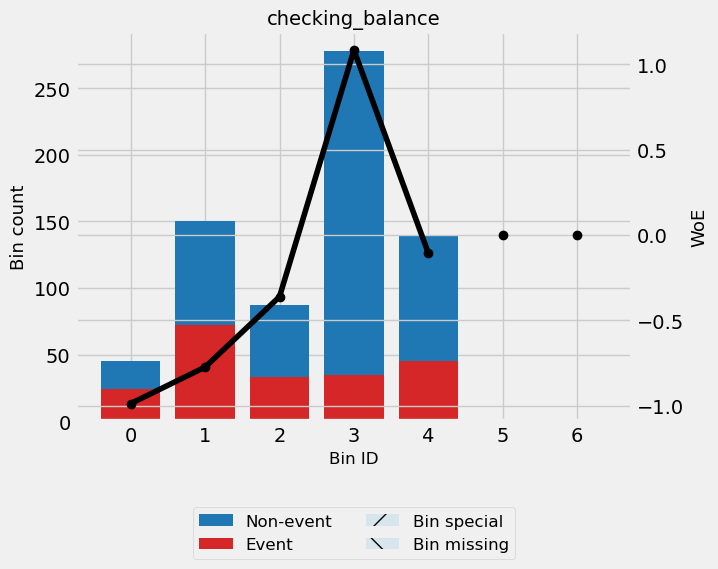

WoE for bin 0 = -0.9876412684542323
WoE for bin 1 = -0.7740671681561732
WoE for bin 2 = -0.3616333907319153
WoE for bin 3 = 1.083603506021425
WoE for bin 4 = -0.10689547399948865
months_loan_duration


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,months_loan_duration,"(-inf, 7.50)",54,0.077143,48,6,0.111111,1.225332,0.084611,0.009961
1,months_loan_duration,"[7.50, 11.50)",62,0.088571,48,14,0.225806,0.378034,0.011634,0.001446
2,months_loan_duration,"[11.50, 17.00)",179,0.255714,134,45,0.251397,0.237067,0.013655,0.001703
3,months_loan_duration,"[17.00, 26.50)",239,0.341429,169,70,0.292887,0.027294,0.000253,0.000032
4,months_loan_duration,"[26.50, 33.00)",42,0.060000,29,13,0.309524,-0.051763,0.000162,0.000020
5,months_loan_duration,"[33.00, 43.50)",73,0.104286,41,32,0.438356,-0.606274,0.042201,0.005196
6,months_loan_duration,"[43.50, inf)",51,0.072857,22,29,0.568627,-1.130363,0.106197,0.012610


IV for months_loan_duration = 0.2587133553649368
Since IV is between 0.02 and 0.5, " months_loan_duration " should be used going forward.
The IV of " months_loan_duration " is 0.2587133553649368 , which is medium predictive power.


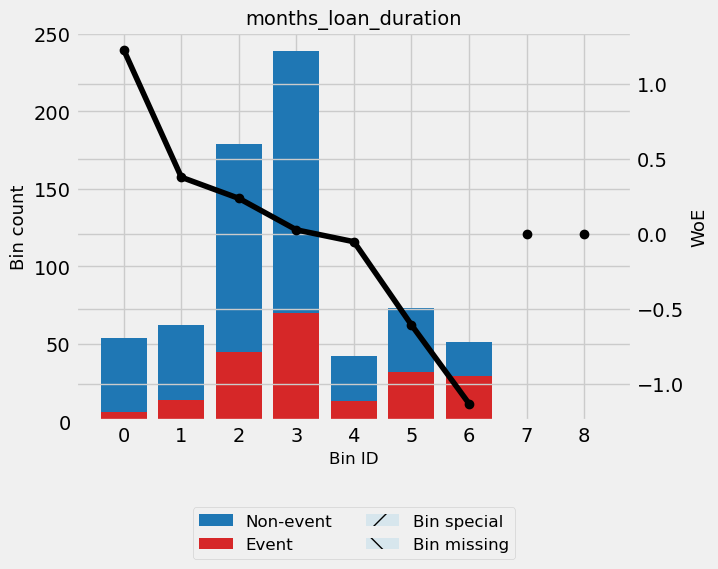

WoE for bin 0 = 1.2253316658501263
WoE for bin 1 = 0.37803380546292265
WoE for bin 2 = 0.23706743435088193
WoE for bin 3 = 0.02729359704400485
WoE for bin 4 = -0.051763403304772256
WoE for bin 5 = -0.6062737119251284
WoE for bin 6 = -1.130363252457868
credit_history


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,credit_history,['critical'],211,0.301429,179,32,0.151659,0.86754,0.183443,0.022237
1,credit_history,['delayed'],65,0.092857,47,18,0.276923,0.105666,0.001014,0.000127
2,credit_history,['repaid'],357,0.510000,238,119,0.333333,-0.160963,0.013626,0.001701
3,credit_history,['fully repaid this bank' 'fully repaid'],67,0.095714,27,40,0.597015,-1.247152,0.170109,0.019985


IV for credit_history = 0.3681921281681744
Since IV is between 0.02 and 0.5, " credit_history " should be used going forward.
The IV of " credit_history " is 0.3681921281681744 , which is strong predictive power.


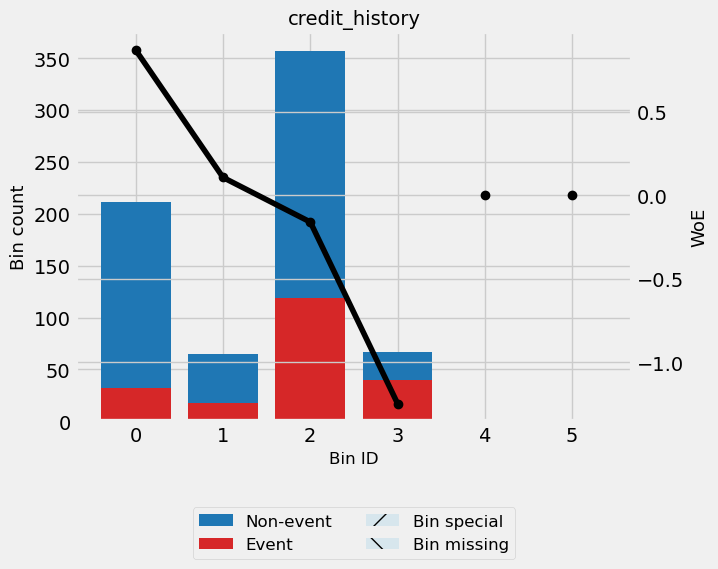

WoE for bin 0 = 0.867540027211319
WoE for bin 1 = 0.10566596798418429
WoE for bin 2 = -0.1609626952697643
WoE for bin 3 = -1.247152463939317
purpose


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,purpose,['retraining' 'car (used)'],80,0.114286,66,14,0.175000,0.696488,0.046967,0.005755
1,purpose,['radio/tv'],202,0.288571,161,41,0.202970,0.513722,0.067673,0.008367
2,purpose,['furniture' 'repairs'],134,0.191429,96,38,0.283582,0.072652,0.000995,0.000124
3,purpose,['business'],65,0.092857,40,25,0.384615,-0.384106,0.014654,0.001821
4,purpose,['car (new)' 'domestic appliances'],179,0.255714,108,71,0.396648,-0.434659,0.052052,0.006456
5,purpose,['education' 'others'],40,0.057143,20,20,0.500000,-0.85411,0.046942,0.005696


IV for purpose = 0.22928323866924277
Since IV is between 0.02 and 0.5, " purpose " should be used going forward.
The IV of " purpose " is 0.22928323866924277 , which is medium predictive power.


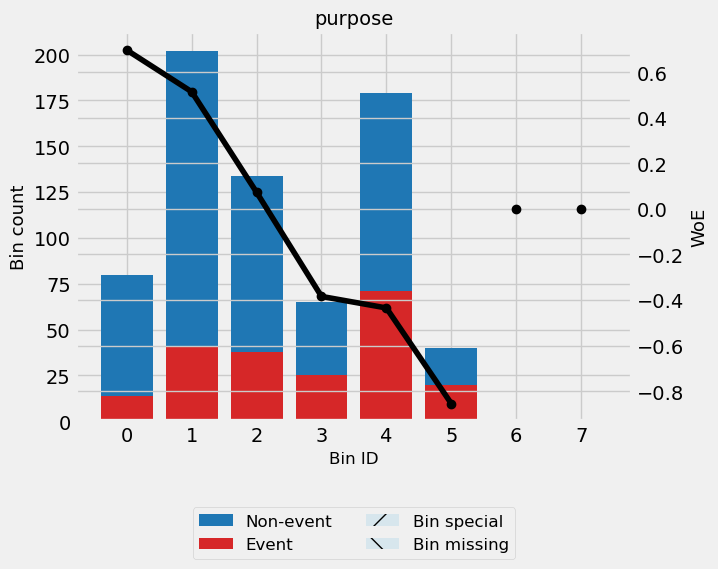

WoE for bin 0 = 0.6964875365814573
WoE for bin 1 = 0.5137224224504456
WoE for bin 2 = 0.07265215591174087
WoE for bin 3 = -0.38410624658397396
WoE for bin 4 = -0.43465852574680525
WoE for bin 5 = -0.8541098758297094
amount


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,amount,"(-inf, 1387.00)",178,0.254286,120,58,0.325843,-0.127061,0.004207,0.000526
1,amount,"[1387.00, 3554.00)",294,0.420000,227,67,0.227891,0.366148,0.051901,0.006452
2,amount,"[3554.00, 3913.50)",37,0.052857,34,3,0.081081,1.573638,0.086381,0.009805
3,amount,"[3913.50, 6322.50)",87,0.124286,56,31,0.356322,-0.262745,0.009005,0.001122
4,amount,"[6322.50, 7839.50)",42,0.060000,27,15,0.357143,-0.266323,0.004469,0.000557
5,amount,"[7839.50, inf)",62,0.088571,27,35,0.564516,-1.113621,0.125254,0.014895


IV for amount = 0.28121633437051957
Since IV is between 0.02 and 0.5, " amount " should be used going forward.
The IV of " amount " is 0.28121633437051957 , which is medium predictive power.


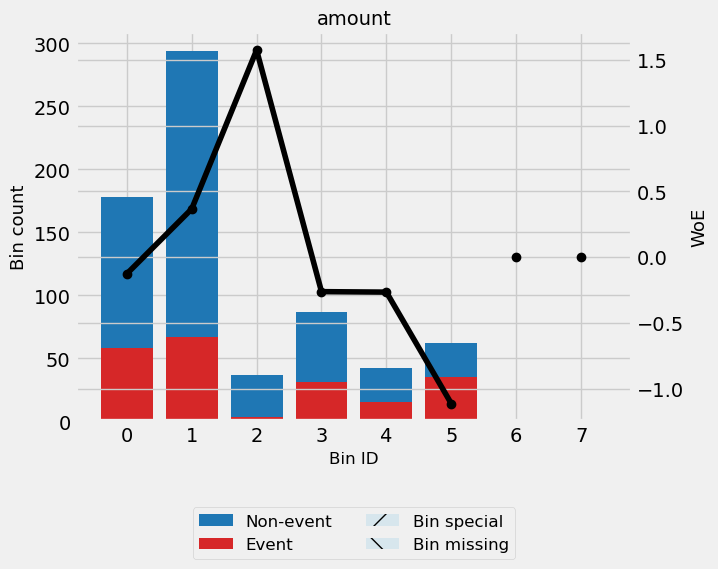

WoE for bin 0 = -0.12706114359408294
WoE for bin 1 = 0.3661475222607271
WoE for bin 2 = 1.5736383601183421
WoE for bin 3 = -0.26274538957970656
WoE for bin 4 = -0.26632321092759065
WoE for bin 5 = -1.1136210713147943
savings_balance


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,savings_balance,"(-inf, 17.50)",80,0.114286,57,23,0.287500,0.053447,0.000323,0.000040
1,savings_balance,"[17.50, 44.50)",117,0.167143,70,47,0.401709,-0.455762,0.037516,0.004649
2,savings_balance,"[44.50, 55.50)",37,0.052857,17,20,0.540541,-1.016629,0.062086,0.007443
3,savings_balance,"[55.50, 90.50)",155,0.221429,104,51,0.329032,-0.141545,0.004559,0.000569
4,savings_balance,"[90.50, 480.50)",99,0.141429,70,29,0.292929,0.02709,0.000103,0.000013
5,savings_balance,"[480.50, 814.00)",159,0.227143,126,33,0.207547,0.485664,0.047947,0.005935
6,savings_balance,"[814.00, inf)",53,0.075714,47,6,0.113208,1.204278,0.080705,0.009520


IV for savings_balance = 0.23323808292025194
Since IV is between 0.02 and 0.5, " savings_balance " should be used going forward.
The IV of " savings_balance " is 0.23323808292025194 , which is medium predictive power.


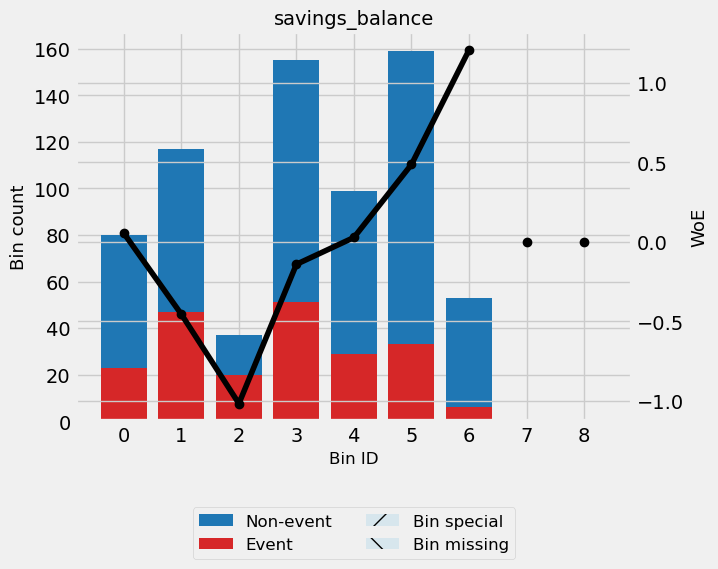

WoE for bin 0 = 0.05344717607569092
WoE for bin 1 = -0.45576223549040934
WoE for bin 2 = -1.0166288053274846
WoE for bin 3 = -0.14154460941266261
WoE for bin 4 = 0.02708953623317518
WoE for bin 5 = 0.48566446965528837
WoE for bin 6 = 1.204278256652294
installment_rate


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,installment_rate,"(-inf, 1.50)",94,0.134286,69,25,0.265957,0.161121,0.003369,0.000421
1,installment_rate,"[1.50, 2.50)",162,0.231429,117,45,0.277778,0.101402,0.002330,0.000291
2,installment_rate,"[2.50, 3.50)",107,0.152857,76,31,0.289720,0.042636,0.000275,0.000034
3,installment_rate,"[3.50, inf)",337,0.481429,229,108,0.320475,-0.102519,0.005162,0.000645


IV for installment_rate = 0.01113686717172772
Since IV is less than 0.02, " installment_rate " is not useful for prediction, thus should be NOT used going forward.


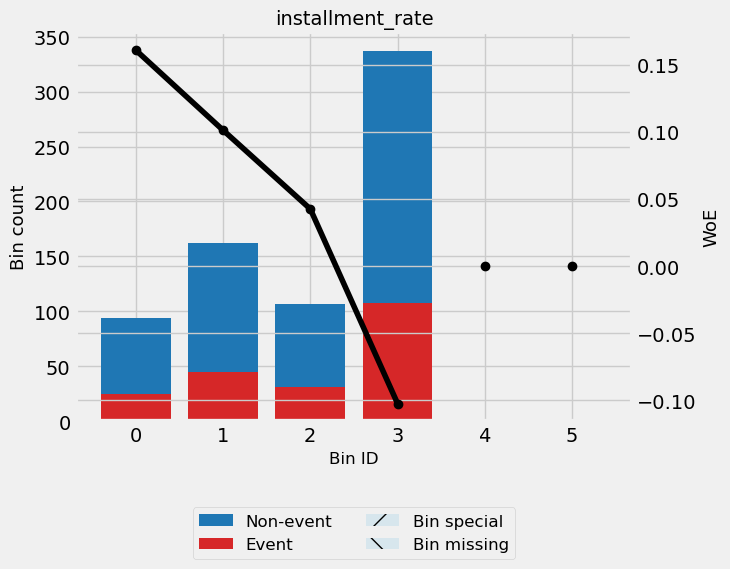

WoE for bin 0 = 0.1611208038993491
WoE for bin 1 = 0.10140156919772671
WoE for bin 2 = 0.0426362599714751
WoE for bin 3 = -0.10251909939968966
personal_status


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,personal_status,['single'],385,0.550000,284,101,0.262338,0.179744,0.017104,0.002135
1,personal_status,['married'],64,0.091429,46,18,0.281250,0.08416,0.000636,0.000080
2,personal_status,['divorced' 'Unknown'],251,0.358571,161,90,0.358566,-0.272515,0.027993,0.003488


IV for personal_status = 0.04573314056741434
Since IV is between 0.02 and 0.5, " personal_status " should be used going forward.
The IV of " personal_status " is 0.04573314056741434 , which is weak predictive power.


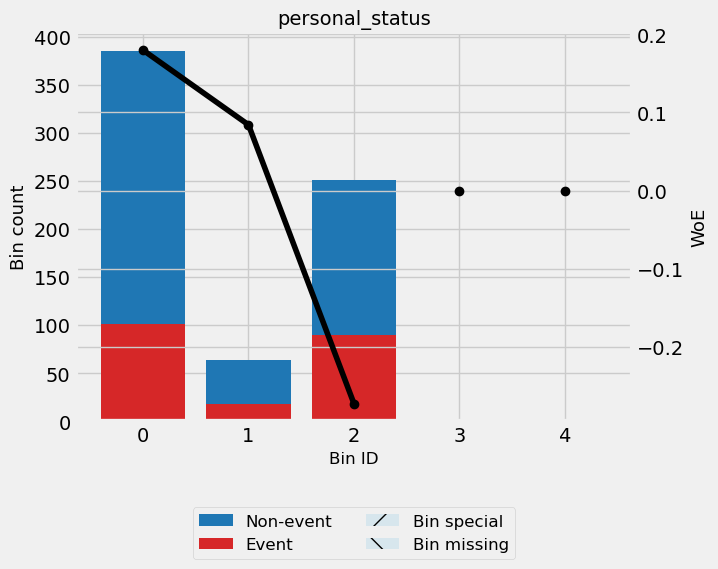

WoE for bin 0 = 0.17974384549023692
WoE for bin 1 = 0.0841597627632207
WoE for bin 2 = -0.27251518117551177
other_debtors


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,other_debtors,['guarantor'],40,0.057143,31,9,0.22500,0.382653,0.007681,0.000954
1,other_debtors,['none' 'co-applicant'],660,0.942857,460,200,0.30303,-0.021201,0.000426,0.000053


IV for other_debtors = 0.008107058329163948
Since IV is less than 0.02, " other_debtors " is not useful for prediction, thus should be NOT used going forward.


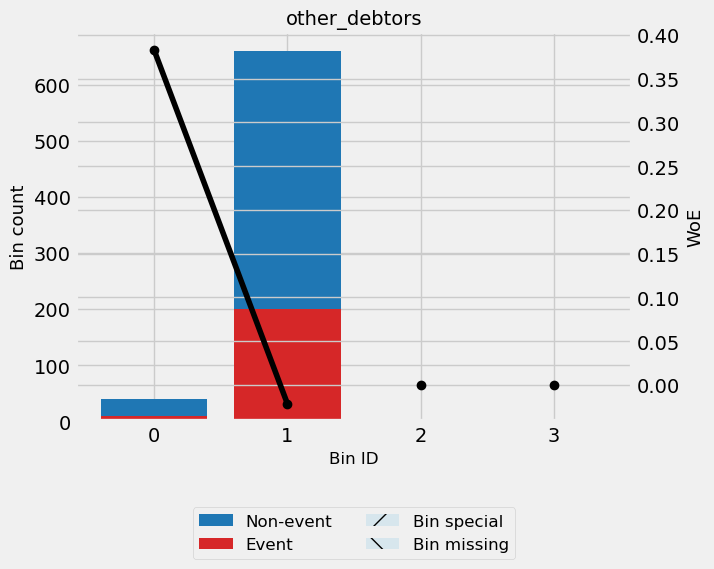

WoE for bin 0 = 0.3826527513192173
WoE for bin 1 = -0.021200752894605625
property


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,property,['real estate'],197,0.281429,158,39,0.197970,0.544924,0.073668,0.009096
1,property,['other'],234,0.334286,162,72,0.307692,-0.04318,0.000629,0.000079
2,property,['building society savings'],162,0.231429,112,50,0.308642,-0.047634,0.000530,0.000066
3,property,['unknown/none'],107,0.152857,59,48,0.448598,-0.647773,0.070933,0.008715


IV for property = 0.1457591917382032
Since IV is between 0.02 and 0.5, " property " should be used going forward.
The IV of " property " is 0.1457591917382032 , which is medium predictive power.


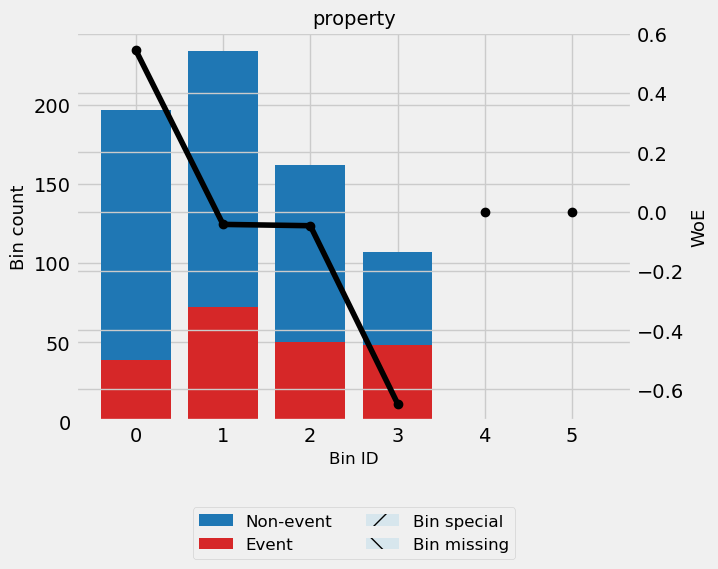

WoE for bin 0 = 0.5449235110676108
WoE for bin 1 = -0.04317965961338084
WoE for bin 2 = -0.047634009962761
WoE for bin 3 = -0.6477734428318811
age


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,age,"(-inf, 25.50)",128,0.182857,71,57,0.445312,-0.634481,0.081293,0.009994
1,age,"[25.50, 29.50)",136,0.194286,90,46,0.338235,-0.182942,0.006732,0.000840
2,age,"[29.50, 34.50)",122,0.174286,86,36,0.295082,0.016718,0.000049,0.000006
3,age,"[34.50, 36.50)",50,0.071429,43,7,0.140000,0.96118,0.051984,0.006259
4,age,"[36.50, inf)",264,0.377143,201,63,0.238636,0.30606,0.033034,0.004113


IV for age = 0.17309077989203564
Since IV is between 0.02 and 0.5, " age " should be used going forward.
The IV of " age " is 0.17309077989203564 , which is medium predictive power.


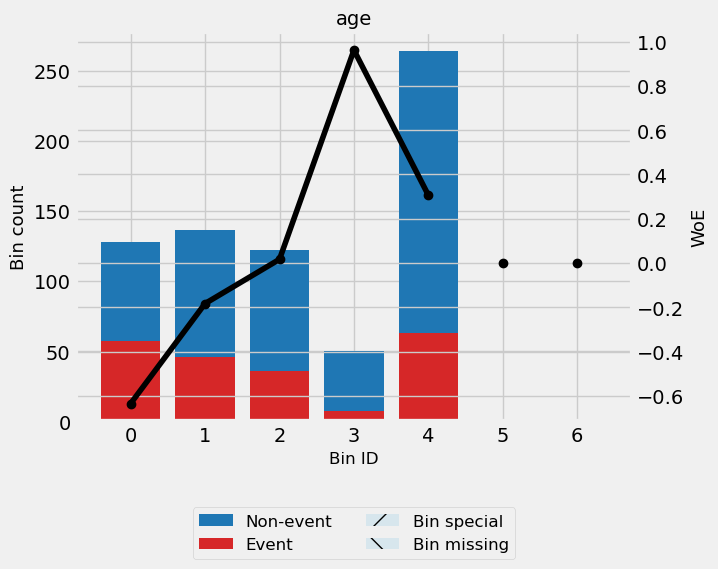

WoE for bin 0 = -0.6344812666229442
WoE for bin 1 = -0.1829416019885395
WoE for bin 2 = 0.01671848196768812
WoE for bin 3 = 0.9611800908085396
WoE for bin 4 = 0.3060603058378335
installment_plan


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,installment_plan,['none'],575,0.821429,414,161,0.280,0.090352,0.006581,0.000822
1,installment_plan,['stores' 'bank'],125,0.178571,77,48,0.384,-0.381505,0.027790,0.003453


IV for installment_plan = 0.034371145248594914
Since IV is between 0.02 and 0.5, " installment_plan " should be used going forward.
The IV of " installment_plan " is 0.034371145248594914 , which is weak predictive power.


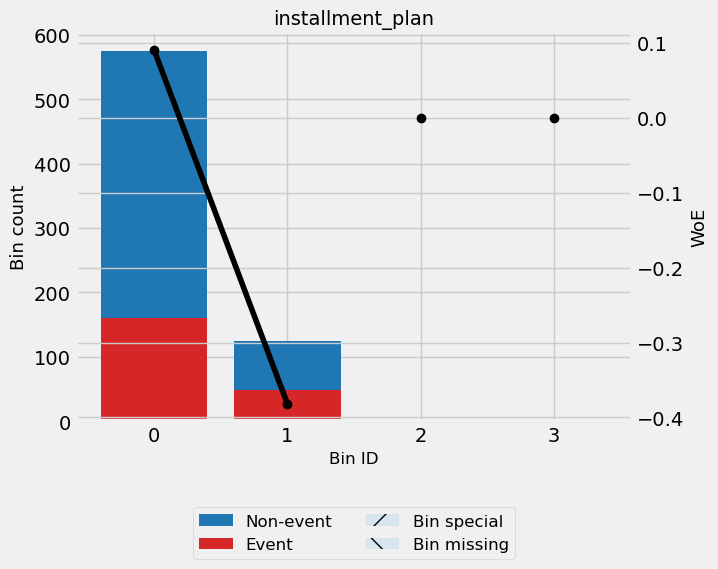

WoE for bin 0 = 0.09035173301114166
WoE for bin 1 = -0.3815054648839167
housing


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,housing,['own'],502,0.717143,374,128,0.254980,0.218116,0.032558,0.004062
1,housing,['rent'],122,0.174286,75,47,0.385246,-0.386769,0.027898,0.003466
2,housing,['for free'],76,0.108571,42,34,0.447368,-0.642801,0.049585,0.006094


IV for housing = 0.11004174147153623
Since IV is between 0.02 and 0.5, " housing " should be used going forward.
The IV of " housing " is 0.11004174147153623 , which is medium predictive power.


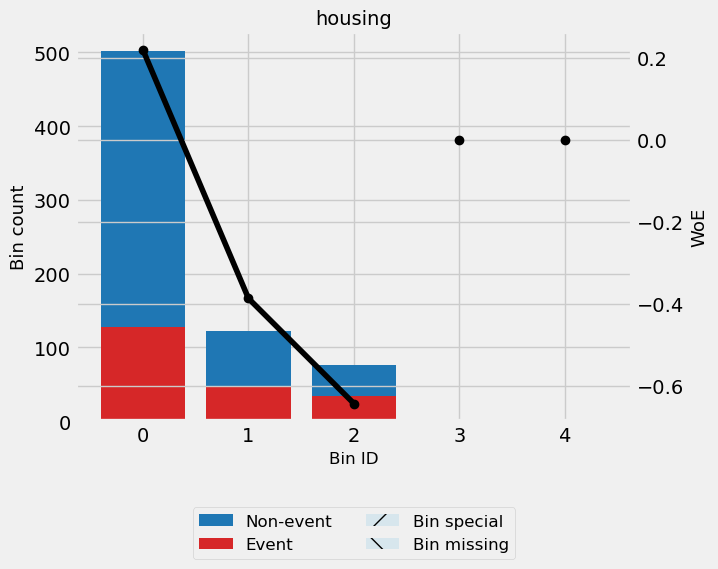

WoE for bin 0 = 0.21811565766520524
WoE for bin 1 = -0.3867693640034576
WoE for bin 2 = -0.6428007821625026
existing_credits


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,existing_credits,"(-inf, 1.50)",435,0.621429,296,139,0.319540,-0.098224,0.006112,0.000764
1,existing_credits,"[1.50, inf)",265,0.378571,195,70,0.264151,0.170394,0.010602,0.001324


IV for existing_credits = 0.01671358138477968
Since IV is less than 0.02, " existing_credits " is not useful for prediction, thus should be NOT used going forward.


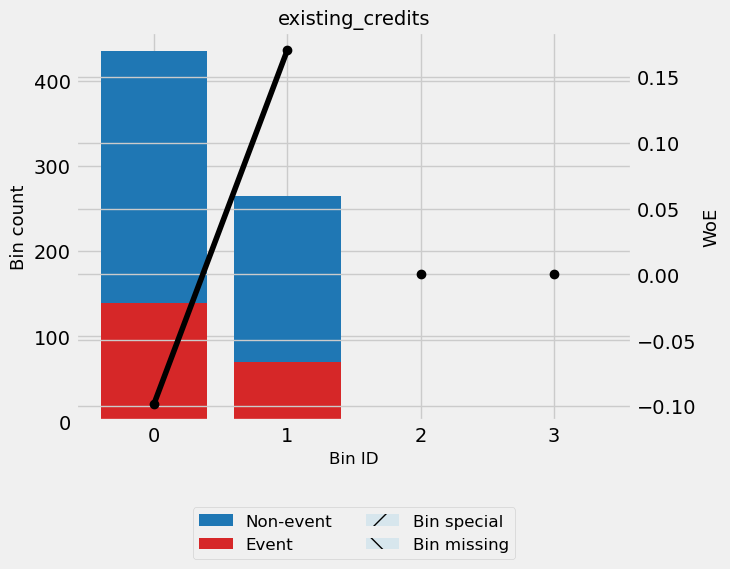

WoE for bin 0 = -0.098224354636341
WoE for bin 1 = 0.17039444068467816
dependents


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,dependents,"(-inf, 1.50)",604,0.862857,424,180,0.298013,0.002667,0.000006,7.666072e-07
1,dependents,"[1.50, inf)",96,0.137143,67,29,0.302083,-0.016713,0.000038,4.804474e-06


IV for dependents = 4.456909856061991e-05
Since IV is less than 0.02, " dependents " is not useful for prediction, thus should be NOT used going forward.


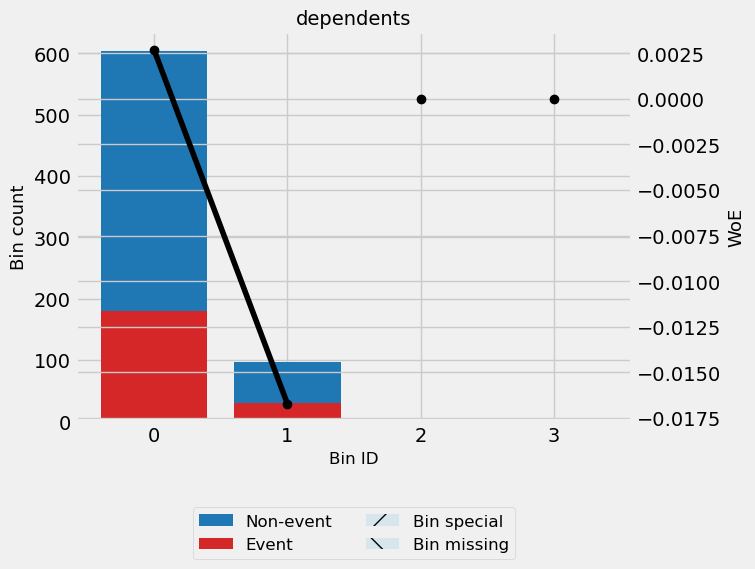

WoE for bin 0 = 0.0026667285120378663
WoE for bin 1 = -0.01671308642521754
foreign_worker


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,foreign_worker,['no' 'yes'],700,1.0,491,209,0.298571,-0.0,0.0,0.0


IV for foreign_worker = 0.0
Since IV is less than 0.02, " foreign_worker " is not useful for prediction, thus should be NOT used going forward.


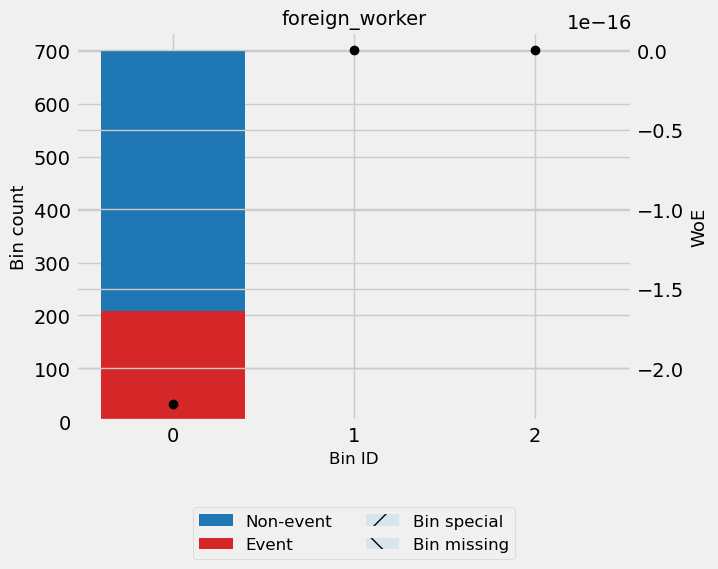

WoE for bin 0 = 0.0
job


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,job,['unskilled resident'],129,0.184286,94,35,0.271318,0.133837,0.003210,0.000401
1,job,['skilled employee'],441,0.630000,311,130,0.294785,0.018149,0.000207,0.000026
2,job,['unemployed non-resident' 'mangement self-emp...,130,0.185714,86,44,0.338462,-0.183952,0.006507,0.000812


IV for job = 0.009923451868747844
Since IV is less than 0.02, " job " is not useful for prediction, thus should be NOT used going forward.


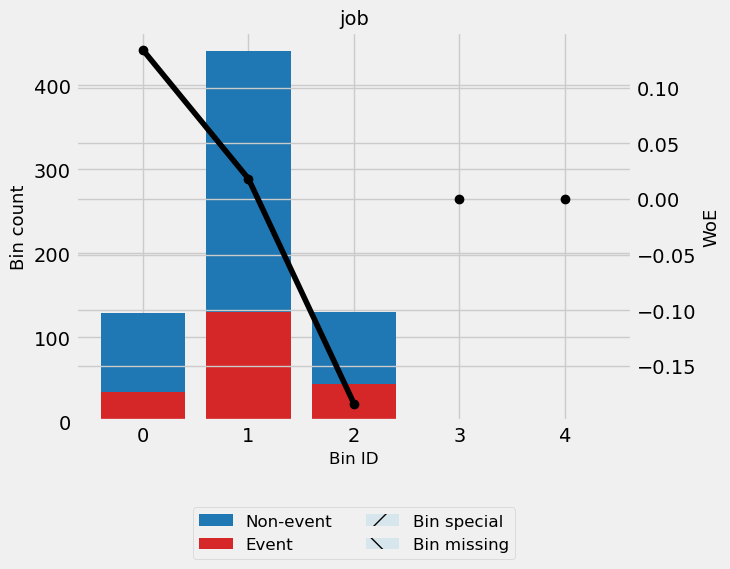

WoE for bin 0 = 0.13383684495088038
WoE for bin 1 = 0.018148585893942085
WoE for bin 2 = -0.18395221349446295
gender


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,gender,['male'],478,0.682857,349,129,0.269874,0.14115,0.013207,0.001650
1,gender,['female'],222,0.317143,142,80,0.360360,-0.280309,0.026228,0.003268


IV for gender = 0.039435681787566006
Since IV is between 0.02 and 0.5, " gender " should be used going forward.
The IV of " gender " is 0.039435681787566006 , which is weak predictive power.


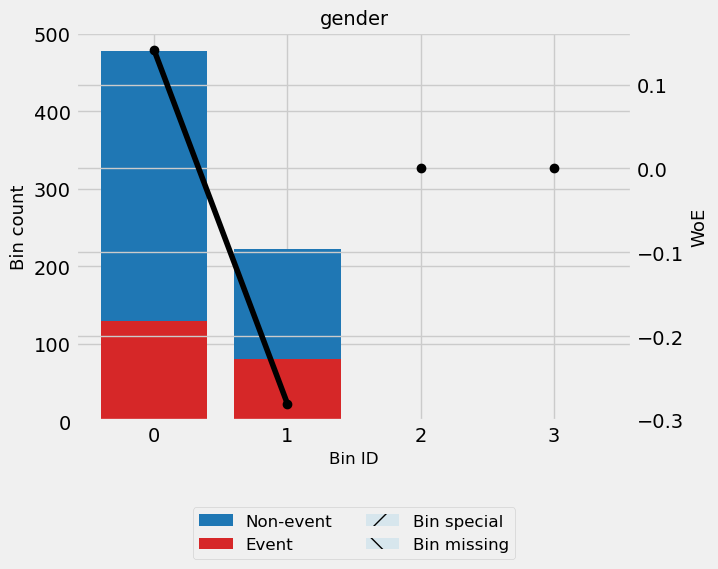

WoE for bin 0 = 0.14114964201104535
WoE for bin 1 = -0.28030945290233056
employment_length_years


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,employment_length_years,"(-inf, 0.29)",37,0.052857,20,17,0.459459,-0.691591,0.028083,0.003442
1,employment_length_years,"[0.29, 3.50)",362,0.517143,245,117,0.323204,-0.115026,0.006997,0.000874
2,employment_length_years,"[3.50, 5.50)",62,0.088571,44,18,0.290323,0.039708,0.000139,0.000017
3,employment_length_years,"[5.50, 7.50)",75,0.107143,56,19,0.253333,0.226803,0.005249,0.000655
4,employment_length_years,"[7.50, 10.50)",41,0.058571,32,9,0.219512,0.414401,0.009163,0.001137
5,employment_length_years,"[10.50, 15.50)",72,0.102857,59,13,0.180556,0.658478,0.038167,0.004686
6,employment_length_years,"[15.50, inf)",51,0.072857,35,16,0.313725,-0.071351,0.000376,0.000047


IV for employment_length_years = 0.08817302248389108
Since IV is between 0.02 and 0.5, " employment_length_years " should be used going forward.
The IV of " employment_length_years " is 0.08817302248389108 , which is weak predictive power.


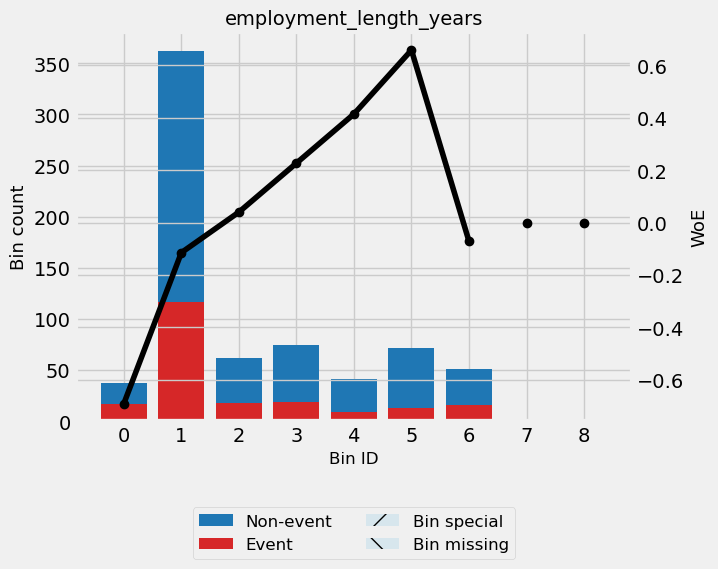

WoE for bin 0 = -0.6915909463319346
WoE for bin 1 = -0.11502560008273875
WoE for bin 2 = 0.039708000192386864
WoE for bin 3 = 0.22680283573899915
WoE for bin 4 = 0.41440144963379744
WoE for bin 5 = 0.6584782106144733
WoE for bin 6 = -0.07135053658007717
residence_history_years


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,residence_history_years,"(-inf, 0.29)",78,0.111429,47,31,0.397436,-0.437949,0.023037,0.002857
1,residence_history_years,"[0.29, 0.54)",48,0.068571,33,15,0.312500,-0.065653,0.000299,0.000037
2,residence_history_years,"[0.54, 13.50)",421,0.601429,299,122,0.289786,0.042313,0.001068,0.000133
3,residence_history_years,"[13.50, 18.50)",71,0.101429,57,14,0.197183,0.549884,0.027001,0.003333
4,residence_history_years,"[18.50, 21.50)",38,0.054286,27,11,0.289474,0.043832,0.000103,0.000013
5,residence_history_years,"[21.50, inf)",44,0.062857,28,16,0.363636,-0.294494,0.005751,0.000716


IV for residence_history_years = 0.05725999414381152
Since IV is between 0.02 and 0.5, " residence_history_years " should be used going forward.
The IV of " residence_history_years " is 0.05725999414381152 , which is weak predictive power.


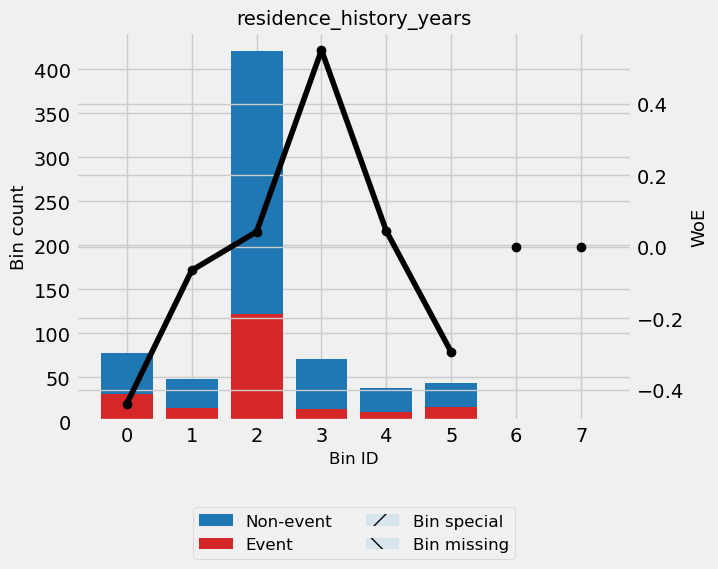

WoE for bin 0 = -0.4379494786047972
WoE for bin 1 = -0.06565251546543942
WoE for bin 2 = 0.04231265282772012
WoE for bin 3 = 0.5498840623895819
WoE for bin 4 = 0.043831717376248996
WoE for bin 5 = -0.29449408789428677
installment_rate_amount


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,installment_rate_amount,"(-inf, 5144.00)",253,0.361429,185,68,0.268775,0.146738,0.007546,0.000942
1,installment_rate_amount,"[5144.00, 5551.00)",41,0.058571,31,10,0.243902,0.277292,0.004240,0.000528
2,installment_rate_amount,"[5551.00, 6166.00)",41,0.058571,38,3,0.073171,1.684864,0.106212,0.011900
3,installment_rate_amount,"[6166.00, 8570.00)",108,0.154286,82,26,0.240741,0.294513,0.012547,0.001563
4,installment_rate_amount,"[8570.00, 9605.00)",36,0.051429,23,13,0.361111,-0.283565,0.004355,0.000543
5,installment_rate_amount,"[9605.00, 16170.00)",135,0.192857,86,49,0.362963,-0.291583,0.017290,0.002154
6,installment_rate_amount,"[16170.00, 23576.00)",44,0.062857,28,16,0.363636,-0.294494,0.005751,0.000716
7,installment_rate_amount,"[23576.00, inf)",42,0.060000,18,24,0.571429,-1.141792,0.089257,0.010588


IV for installment_rate_amount = 0.24719794544753051
Since IV is between 0.02 and 0.5, " installment_rate_amount " should be used going forward.
The IV of " installment_rate_amount " is 0.24719794544753051 , which is medium predictive power.


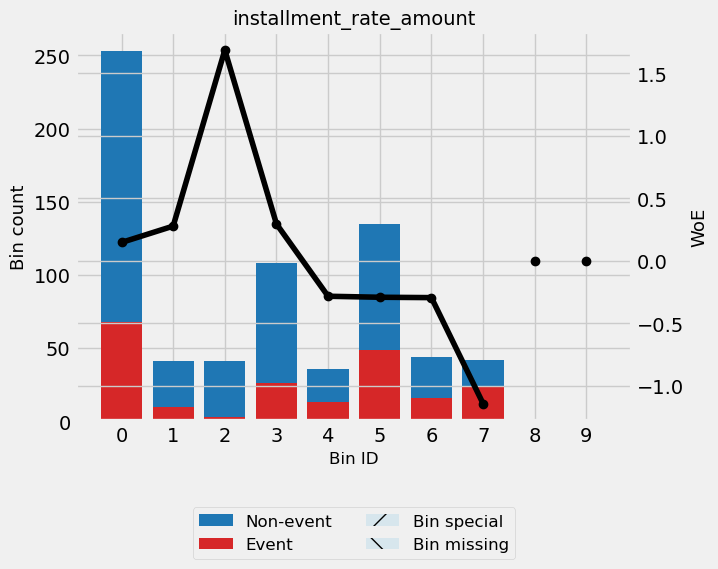

WoE for bin 0 = 0.14673824407250857
WoE for bin 1 = 0.2772922356613911
WoE for bin 2 = 1.6848639952285664
WoE for bin 3 = 0.29451283341306145
WoE for bin 4 = -0.2835650173620966
WoE for bin 5 = -0.2915828776868284
WoE for bin 6 = -0.29449408789428677
WoE for bin 7 = -1.1417919482814904
savings_to_amount_ratio


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,savings_to_amount_ratio,"(-inf, 0.00)",37,0.052857,17,20,0.540541,-1.016629,0.062086,0.007443
1,savings_to_amount_ratio,"[0.00, 0.01)",111,0.158571,65,46,0.414414,-0.508364,0.044590,0.005515
2,savings_to_amount_ratio,"[0.01, 0.05)",240,0.342857,163,77,0.320833,-0.104165,0.003796,0.000474
3,savings_to_amount_ratio,"[0.05, 0.09)",66,0.094286,47,19,0.287879,0.051599,0.000248,0.000031
4,savings_to_amount_ratio,"[0.09, 0.18)",63,0.090000,49,14,0.222222,0.398653,0.013080,0.001624
5,savings_to_amount_ratio,"[0.18, 0.98)",144,0.205714,114,30,0.208333,0.480891,0.042626,0.005277
6,savings_to_amount_ratio,"[0.98, inf)",39,0.055714,36,3,0.076923,1.630797,0.096161,0.010843


IV for savings_to_amount_ratio = 0.2625875019896
Since IV is between 0.02 and 0.5, " savings_to_amount_ratio " should be used going forward.
The IV of " savings_to_amount_ratio " is 0.2625875019896 , which is medium predictive power.


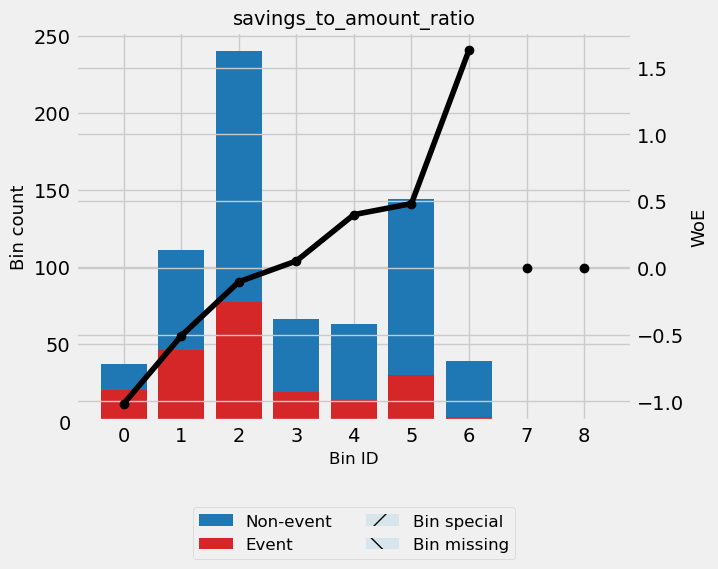

WoE for bin 0 = -1.0166288053274846
WoE for bin 1 = -0.5083640024231676
WoE for bin 2 = -0.10416509687663099
WoE for bin 3 = 0.05159874671390851
WoE for bin 4 = 0.3986530926656584
WoE for bin 5 = 0.48089119090263055
WoE for bin 6 = 1.6307967739582907
loan_duration_to_employment_length


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,loan_duration_to_employment_length,"(-inf, 1.27)",89,0.127143,74,15,0.168539,0.741905,0.058568,0.007158
1,loan_duration_to_employment_length,"[1.27, 2.43)",120,0.171429,95,25,0.208333,0.480891,0.035521,0.004398
2,loan_duration_to_employment_length,"[2.43, 3.40)",73,0.104286,55,18,0.246575,0.262852,0.006806,0.000848
3,loan_duration_to_employment_length,"[3.40, 4.35)",67,0.095714,49,18,0.268657,0.147339,0.002014,0.000252
4,loan_duration_to_employment_length,"[4.35, 12.26)",264,0.377143,177,87,0.329545,-0.143868,0.008025,0.001002
5,loan_duration_to_employment_length,"[12.26, inf)",87,0.124286,41,46,0.528736,-0.969179,0.132383,0.015929


IV for loan_duration_to_employment_length = 0.24331680623103102
Since IV is between 0.02 and 0.5, " loan_duration_to_employment_length " should be used going forward.
The IV of " loan_duration_to_employment_length " is 0.24331680623103102 , which is medium predictive power.


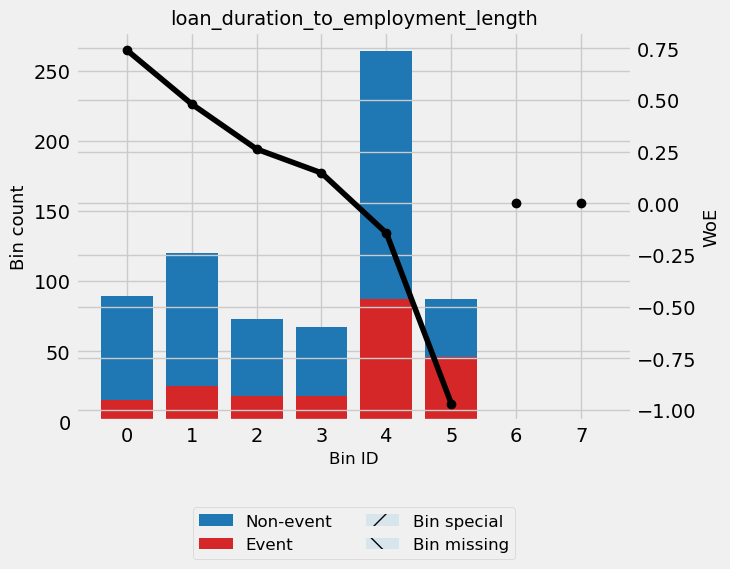

WoE for bin 0 = 0.7419050162722501
WoE for bin 1 = 0.48089119090263055
WoE for bin 2 = 0.2628515515065966
WoE for bin 3 = 0.14733866438475232
WoE for bin 4 = -0.14386826191046417
WoE for bin 5 = -0.9691792056144969
existing_credits_to_age


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,existing_credits_to_age,"(-inf, 0.02)",36,0.051429,30,6,0.166667,0.755328,0.024466,0.002988
1,existing_credits_to_age,"[0.02, 0.03)",146,0.208571,106,40,0.273973,0.12045,0.002951,0.000369
2,existing_credits_to_age,"[0.03, 0.07)",427,0.610000,301,126,0.295082,0.016718,0.000170,0.000021
3,existing_credits_to_age,"[0.07, 0.07)",42,0.060000,28,14,0.333333,-0.160963,0.001603,0.000200
4,existing_credits_to_age,"[0.07, inf)",49,0.070000,26,23,0.469388,-0.731508,0.041765,0.005107


IV for existing_credits_to_age = 0.07095533097572279
Since IV is between 0.02 and 0.5, " existing_credits_to_age " should be used going forward.
The IV of " existing_credits_to_age " is 0.07095533097572279 , which is weak predictive power.


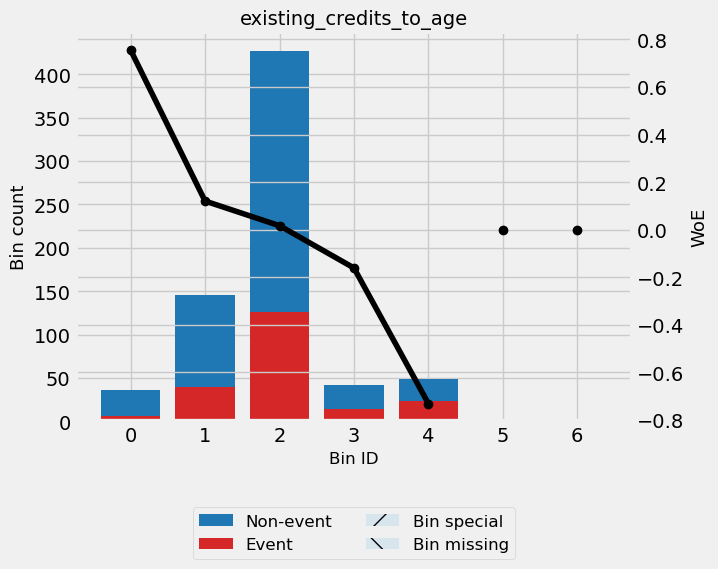

WoE for bin 0 = 0.7553280366043907
WoE for bin 1 = 0.12044976416842128
WoE for bin 2 = 0.01671848196768812
WoE for bin 3 = -0.1609626952697643
WoE for bin 4 = -0.7315075537373773
amount_to_years_at_residence


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,amount_to_years_at_residence,"(-inf, 70.84)",43,0.061429,36,7,0.162791,0.783499,0.031204,0.003804
1,amount_to_years_at_residence,"[70.84, 175.95)",120,0.171429,88,32,0.266667,0.157491,0.004113,0.000514
2,amount_to_years_at_residence,"[175.95, 1135.10)",329,0.470000,234,95,0.288754,0.047334,0.001043,0.000130
3,amount_to_years_at_residence,"[1135.10, 2379.69)",114,0.162857,81,33,0.289474,0.043832,0.000310,0.000039
4,amount_to_years_at_residence,"[2379.69, 3732.84)",47,0.067143,31,16,0.340426,-0.192711,0.002586,0.000323
5,amount_to_years_at_residence,"[3732.84, inf)",47,0.067143,21,26,0.553191,-1.067684,0.087157,0.010405


IV for amount_to_years_at_residence = 0.12641355967517537
Since IV is between 0.02 and 0.5, " amount_to_years_at_residence " should be used going forward.
The IV of " amount_to_years_at_residence " is 0.12641355967517537 , which is medium predictive power.


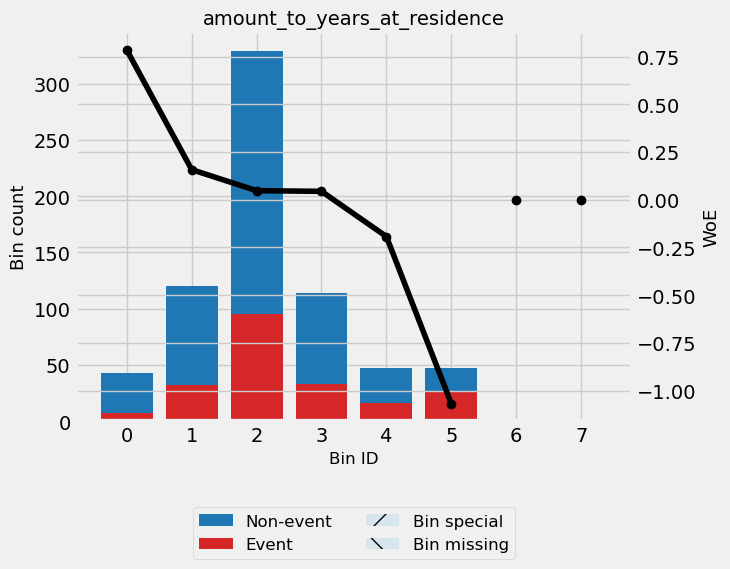

WoE for bin 0 = 0.7834989135710869
WoE for bin 1 = 0.1574910358487703
WoE for bin 2 = 0.04733434792745101
WoE for bin 3 = 0.043831717376248996
WoE for bin 4 = -0.19271139358434447
WoE for bin 5 = -1.0676839761277688
loan_duration_to_years_at_residence


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,loan_duration_to_years_at_residence,"(-inf, 0.65)",49,0.070000,43,6,0.122449,1.115331,0.065658,7.806616e-03
1,loan_duration_to_years_at_residence,"[0.65, 0.95)",38,0.054286,29,9,0.236842,0.315961,0.005056,6.293440e-04
2,loan_duration_to_years_at_residence,"[0.95, 1.43)",73,0.104286,55,18,0.246575,0.262852,0.006806,8.482749e-04
3,loan_duration_to_years_at_residence,"[1.43, 2.07)",73,0.104286,52,21,0.287671,0.052611,0.000286,3.569170e-05
4,loan_duration_to_years_at_residence,"[2.07, 19.08)",406,0.580000,285,121,0.298030,0.002589,0.000004,4.856176e-07
5,loan_duration_to_years_at_residence,"[19.08, inf)",61,0.087143,27,34,0.557377,-1.084634,0.116804,1.392440e-02


IV for loan_duration_to_years_at_residence = 0.19461217463704727
Since IV is between 0.02 and 0.5, " loan_duration_to_years_at_residence " should be used going forward.
The IV of " loan_duration_to_years_at_residence " is 0.19461217463704727 , which is medium predictive power.


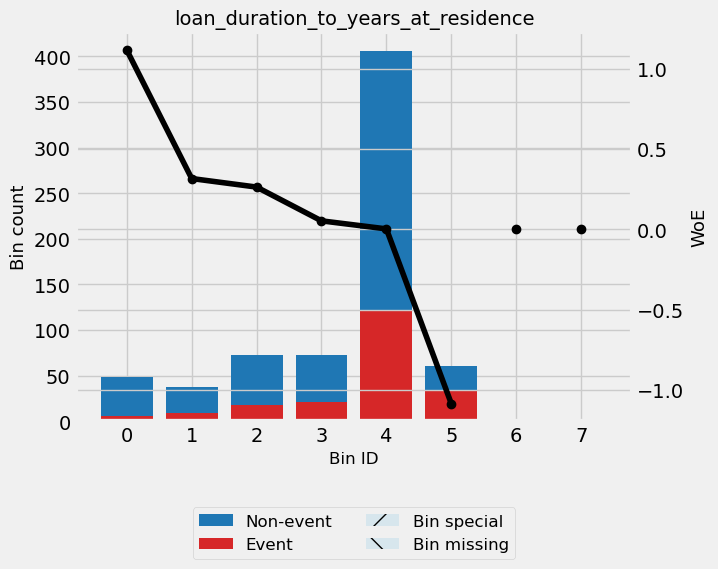

WoE for bin 0 = 1.1153307706357978
WoE for bin 1 = 0.31596137682054504
WoE for bin 2 = 0.2628515515065966
WoE for bin 3 = 0.05261140502829493
WoE for bin 4 = 0.002588758842199743
WoE for bin 5 = -1.0846335344415419
years_at_residence_per_month_of_loan_duration


,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,years_at_residence_per_month_of_loan_duration,"(-inf, 0.05)",48,0.068571,29,19,0.395833,-0.431253,0.013734,0.001704
1,years_at_residence_per_month_of_loan_duration,"[0.05, 0.13)",44,0.062857,21,23,0.522727,-0.945082,0.063583,0.007665
2,years_at_residence_per_month_of_loan_duration,"[0.13, 7.06)",521,0.744286,369,152,0.291747,0.032806,0.000796,0.000099
3,years_at_residence_per_month_of_loan_duration,"[7.06, 9.28)",50,0.071429,39,11,0.220000,0.411556,0.011029,0.001369
4,years_at_residence_per_month_of_loan_duration,"[9.28, inf)",37,0.052857,33,4,0.108108,1.256103,0.060382,0.007088


IV for years_at_residence_per_month_of_loan_duration = 0.14952368901327917
Since IV is between 0.02 and 0.5, " years_at_residence_per_month_of_loan_duration " should be used going forward.
The IV of " years_at_residence_per_month_of_loan_duration " is 0.14952368901327917 , which is medium predictive power.


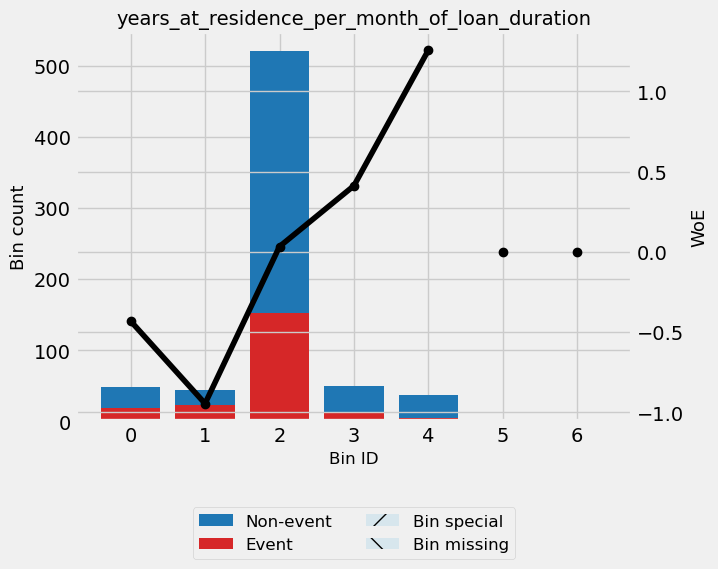

WoE for bin 0 = -0.43125302500967605
WoE for bin 1 = -0.9450816540354363
WoE for bin 2 = 0.03280624736454121
WoE for bin 3 = 0.41155649750156637
WoE for bin 4 = 1.25610332451688


In [382]:
selected_variables = []

for variable in variable_names:
    x_in = X_train[variable].values
    y_in = y_train

    dtype = "numerical" if X_train[variable].dtype != 'object' else "categorical"
    optb = OptimalBinning(name=variable, dtype=dtype, solver="cp")
    optb.fit(x_in, y_in)
    
    # print(optb.status)
    # print(optb.splits)
    
    binning_table = optb.binning_table
    bt = binning_table.build() 

    # Ensure that `bt.Bin` is a string type, and replace any NaN values with an empty string to avoid errors
    bt['Bin'] = bt['Bin'].astype(str).fillna('')
    
    #create a "complete" list of binning tables that we will use for the final scorecard. 
    #drop the "Specials", "Missing", and "Totals" rows
    bt_to_add = bt[~bt.Bin.str.contains("Special")]
    bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
    bt_to_add = bt_to_add.iloc[:-1 , :]

    #print variable
    print(color.DARKCYAN + variable + color.END)
    
    #prepare the data to be added to bt_complete
    bt_to_add.insert (0, "Variable Name", variable)
    bt_complete=bt_to_add #add these results to the complete results
    display(bt_complete)
           
    #check for IV
    x = sum(bt_complete['IV'])
    
    print('IV for', variable, '=', x)
    
    #analysis of IV value
    if x > 0.02 and x <0.5:
        selected_variables.append(variable)
        print('Since IV is between 0.02 and 0.5, "', variable, '" should be used going forward.')
        if x < 0.1:
            print('The IV of "', variable, '" is', x, ', which is weak predictive power.')
        elif x < 0.3:
            print('The IV of "', variable, '" is', x, ', which is medium predictive power.')
        else: 
            print('The IV of "', variable, '" is', x, ', which is strong predictive power.')
    elif x < 0.02:
        print('Since IV is less than 0.02, "', variable, '" is not useful for prediction, thus should be NOT used going forward.')
    else:
        print('Since IV is less than 0.02, ""', variable, '" has suspicious predictive power, thus should be NOT used going forward.')
    
    #check for monotonic value
    binning_table.plot(metric = 'woe')
    
    #check for WoE values
    for i in range(0, len(bt_complete)):
        gd = bt_complete.iloc[i]['Non-event'] / bt_complete['Non-event'].sum()
        bd = bt_complete.iloc[i]['Event'] / bt_complete['Event'].sum()
        WoE = np.log(gd / bd)
        print("WoE for bin", i, "=", WoE)

When we plot the WoE values, we want to look for monotonicity, which means the WoE values should either gradually increase or decrease. 

### Why is Monotonicity Important?

Monotonicity indicates a consistent, predictable relationship between the predictor variable and the response variable. This is particularly important for the following reasons:

1. **Model Stability:** Monotonic relationships lead to more stable and reliable models. Non-monotonic relationships can introduce noise and reduce the model"s ability to generalize well to unseen data.

2. **Interpretability:** Monotonic WoE values make the model more interpretable. It is easier to explain that as the value of a certain variable increases, the risk of default increases (or decreases), which is intuitive for stakeholders.

3. **Logistic Regression Compatibility:** Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. Monotonic WoE values help to satisfy this assumption, as they reflect a more straightforward relationship that logistic regression can capture effectively.

### <span style="color:blue;">**WoE Tranformation**</span>


Here now we will replace the attributes of each variable with their repsective weight of evidences. 

this is optional process to do, in order to understand the inner working of the scorecard development. In this assignment, we are using OptBinning but if we have to develop a model using Statsmodel or using logistic regression alone, we would be need to convert the variable attributes to WoE first befroe moving to Modeling. 

In [383]:
import pandas as pd

def process_variable(variable, X_train, y_train, bt_complete, X_trans):
    """
    Process a variable to create a binning table and transform it using WoE.
    
    Parameters:
    - variable (str): The name of the variable to process.
    - X_train (DataFrame): The training features DataFrame.
    - y_train (Series): The target variable.
    - bt_complete (DataFrame): The complete binning table to which results will be appended.
    - X_trans (DataFrame): The DataFrame to which transformed variables will be added.

    Returns:
    - X_trans (DataFrame): Updated DataFrame containing all WoE transformed variables.
    - bt_complete (DataFrame): Updated complete binning table.
    """

    # Fit the Optimal Binning model
    x_in = X_train[variable].values
    dtype = "numerical" if X_train[variable].dtype != 'object' else "categorical"

    optb = OptimalBinning(name=variable, dtype=dtype, solver="cp")
    optb.fit(x_in, y_train)

    # Build the binning table
    binning_table = optb.binning_table
    bt_variable = binning_table.build() 

    # Prepare the binning table for appending
    bt_variable.insert(0, "Variable Name", variable)

    bt_variable['Bin'] = bt_variable['Bin'].astype(str).fillna('')

    # Drop the "Specials", "Missing", and "Totals" rows
    bt_to_add = bt_variable[~bt_variable.Bin.str.contains("Special")]
    bt_to_add = bt_to_add[~bt_to_add.Bin.str.contains("Missing")]  
    bt_to_add = bt_to_add.iloc[:-1, :]  # Remove "Totals"

    # Append to the complete result
    bt_complete = pd.concat([bt_complete, bt_to_add], ignore_index=True, axis=0)

    # Transform the variable and add WoE values to X_trans
    x_transform = optb.transform(X_train[variable], metric='woe')
    X_trans[f'{variable}_woe_trans'] = x_transform

    return X_trans, bt_complete

# Process each variable and accumulate results
X_trans = pd.DataFrame() 
X_tests = pd.DataFrame()
for variable in selected_variables:
    X_trans, bt_complete = process_variable(variable, X_train, y_train, bt_complete, X_trans)
    X_tests, bt_complete = process_variable(variable, X_test, y_test, bt_complete, X_tests)

In [384]:
X_trans.head(5)

,months_loan_duration_woe_trans,credit_history_woe_trans,purpose_woe_trans,amount_woe_trans,savings_balance_woe_trans,personal_status_woe_trans,property_woe_trans,age_woe_trans,installment_plan_woe_trans,housing_woe_trans,gender_woe_trans,employment_length_years_woe_trans,residence_history_years_woe_trans,installment_rate_amount_woe_trans,savings_to_amount_ratio_woe_trans,loan_duration_to_employment_length_woe_trans,existing_credits_to_age_woe_trans,amount_to_years_at_residence_woe_trans,loan_duration_to_years_at_residence_woe_trans,years_at_residence_per_month_of_loan_duration_woe_trans
0,0.027294,0.105666,-0.434659,0.366148,-0.141545,0.179744,-0.647773,0.30606,0.090352,-0.642801,0.141150,0.658478,0.042313,0.294513,-0.104165,0.480891,0.016718,0.047334,0.002589,0.032806
1,0.237067,-0.160963,-0.434659,0.366148,-0.141545,0.179744,-0.043180,0.30606,0.090352,0.218116,0.141150,0.414401,0.549884,0.294513,-0.104165,0.741905,0.120450,0.157491,1.115331,0.411556
2,-0.051763,-0.160963,0.072652,1.573638,1.204278,-0.272515,-0.047634,0.30606,0.090352,-0.386769,-0.280309,0.658478,0.042313,-0.291583,1.630797,0.480891,0.016718,0.047334,0.002589,0.032806
3,0.237067,0.867540,-0.434659,-0.127061,0.053447,0.179744,0.544924,0.30606,0.090352,0.218116,0.141150,0.226803,0.042313,0.146738,-0.508364,0.480891,0.016718,0.047334,0.002589,0.032806
4,-0.606274,0.867540,0.696488,-0.262745,1.204278,0.179744,-0.043180,0.30606,0.090352,0.218116,0.141150,0.414401,0.042313,-0.294494,1.630797,0.147339,0.016718,-0.192711,-1.084634,0.032806


In [385]:
bt_complete.head(5)

,Variable Name,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,years_at_residence_per_month_of_loan_duration,"(-inf, 0.05)",48,0.068571,29,19,0.395833,-0.431253,0.013734,0.001704
1,years_at_residence_per_month_of_loan_duration,"[0.05, 0.13)",44,0.062857,21,23,0.522727,-0.945082,0.063583,0.007665
2,years_at_residence_per_month_of_loan_duration,"[0.13, 7.06)",521,0.744286,369,152,0.291747,0.032806,0.000796,0.000099
3,years_at_residence_per_month_of_loan_duration,"[7.06, 9.28)",50,0.071429,39,11,0.220000,0.411556,0.011029,0.001369
4,years_at_residence_per_month_of_loan_duration,"[9.28, inf)",37,0.052857,33,4,0.108108,1.256103,0.060382,0.007088


## <span style="color:green;">**Section 3: Model Development**</span>
Use Logistic Regression due to its simplicity, interpretability, and transparency in prediction.

### <span style="color:darkorange;">1. Setting up Optbinning Scorecard Object</span>

- Scorecard Object defines the **scorecard scaling**, binning process, estimator (base model)  and intercept

### <span style="color:darkorange;">2. CA Report generation</span>

- **Characteristic Analysis** report is mandatory step during credit risk modeling. this CA report will justify variable selection based upon GBOdds, IV, WoE. The confirmation of CA report is mandatory before proceeding towards next steps. if Portfolio Managers or Risk Analysts do not comply with CA Report in terms of variable involvement or nature of data source. In that case, modeler needs to take a step back and start looking for more features, combination of features to improve model strength in terms of risk and predictablity.

### <span style="color:darkorange;">3. Save the Scorecard Object</span>

- Saving pickle file for deployment purposes.



In [386]:
estimator = LogisticRegression(solver="lbfgs",
                               class_weight='balanced')


### <span style="color:blue;">**Scorecard Object**</span>


In [387]:
# scorecard = Scorecard(binning_process=binning_process,
#                       estimator=estimator, scaling_method="pdo_odds",
#                       scaling_method_params={"pdo": 20, "odds" : 1, "scorecard_points" :350},verbose=True)

scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, 
                      scaling_method="min_max",
                      scaling_method_params={"min": 350, "max" : 800},
                      intercept_based=False,
                      reverse_scorecard=False,
                      verbose=True)

# scorecard = Scorecard(binning_process=binning_process,
#                       estimator=estimator, scaling_method=None,
#                       verbose=True)

In [388]:
scorecard.fit(X_train, y_train)


2024-10-10 16:15:42,659 | INFO : Scorecard building process started.
2024-10-10 16:15:42,660 | INFO : Options: check parameters.
2024-10-10 16:15:42,661 | INFO : Dataset: binary target.
2024-10-10 16:15:42,661 | INFO : Binning process started.
2024-10-10 16:15:43,476 | INFO : Binning process terminated. Time: 0.8144s
2024-10-10 16:15:43,476 | INFO : Fitting estimator.
2024-10-10 16:15:43,479 | INFO : Fitting terminated. Time 0.0031s
2024-10-10 16:15:43,479 | INFO : Scorecard table building started.
2024-10-10 16:15:43,488 | INFO : Scorecard table terminated. Time: 0.0087s
2024-10-10 16:15:43,489 | INFO : Scorecard building process terminated. Time: 0.8287s


Scorecard(binning_process=BinningProcess(categorical_variables=['credit_history',
                                                                'purpose',
                                                                'personal_status',
                                                                'other_debtors',
                                                                'property',
                                                                'installment_plan',
                                                                'housing',
                                                                'foreign_worker',
                                                                'job',
                                                                'gender'],
                                         max_n_bins=8, min_n_bins=2,
                                         selection_criteria={'gini': {'min': 0.02},
                                                             'iv': {'max': 0.5,
                                                                    'min': 0.02,
                                                                    'strategy': 'highest',
                                                                    'top': 9},
                                                             'quality_score': {'min': 0.01}}...
                                                         'installment_rate_amount',
                                                         'savings_to_amount_ratio',
                                                         'loan_duration_to_employment_length',
                                                         'existing_credits_to_age',
                                                         'amount_to_years_at_residence',
                                                         'loan_duration_to_years_at_residence',
                                                         'years_at_residence_per_month_of_loan_duration']),
          estimator=LogisticRegression(class_weight='balanced'),
          scaling_method='min_max',
          scaling_method_params={'max': 800, 'min': 350}, verbose=True)

In [389]:
scorecard.information()


optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Statistics
    Number of records                    700
    Number of variables                   27
    Target type                       binary

    Number of numerical                   17
    Number of categorical                 10
    Number of selected                     7

  Timing
    Total time                          0.83 sec
    Binning process                     0.81 sec   ( 98.27%)
    Estimator                           0.00 sec   (  0.38%)
    Build scorecard                     0.01 sec   (  1.05%)
      rounding                          0.00 sec   (  0.00%)



In [390]:
scorecard.table(style="summary")


,Variable,Bin,Points
0,months_loan_duration,"(-inf, 7.50)",108.088961
1,months_loan_duration,"[7.50, 11.50)",89.952727
2,months_loan_duration,"[11.50, 17.00)",86.935371
3,months_loan_duration,"[17.00, 26.50)",82.445206
4,months_loan_duration,"[26.50, 33.00)",80.753008
5,months_loan_duration,"[33.00, 43.50)",68.883831
6,months_loan_duration,"[43.50, inf)",57.665804
7,months_loan_duration,Special,81.860993
8,months_loan_duration,Missing,81.860993
0,credit_history,[critical],117.136659


### <span style="color:blue;">**CA Report Generation and Important Note**</span>


At this Point, Modeler supposed to send the CA Report to Risk and Portfolio Managers to review the variable selection and their prestive risk. The process will resume once the confirmation and confidence of the Risk and Portfolio Manager maintains on CA Report.



In [391]:
characteristic_report = scorecard.table(style="detailed").reset_index() #Export the CA Report for deployment purposes

In [392]:
characteristic_report.to_excel('/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/reports/CA report.xlsx')

In [393]:
sc = scorecard.table(style="detailed")


In [394]:
sc.groupby("Variable").agg({'Points' : [np.min, np.max]}).sum()


Points  amin    350.0
        amax    800.0
dtype: float64

### <span style="color:blue;">**Save Model**</span>


In [395]:
scorecard.save("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Final model/optbinning-scorecard-model_gini_50.pkl")


## <span style="color:green;">**Section4: Model Evaluation**</span>


Evaluation metrics that are chosen are used to assess the ***model"s discriminative ability*** rather than conventional classification metrics like recall, precision, and F1-score: While recall, precision, and F1-score are useful in many classification contexts, credit risk models are often evaluated on their ability to rank-order risk and their calibration.
    
Evaluation metrics that are being chosen are:

### <span style="color:darkorange;">1. Credit Score Distribution and Predicted Probability of Default</span>
Check the distribution of scores with respect to probablity of default. 

### <span style="color:darkorange;">2. Model performance and Business Impact Analysis</span>
**a. ROC AUC (Receiver Operating Characteristic Area Under the Curve)**: Measures the model"s ability to distinguish between classes. It provides an aggregate measure of performance across all classification thresholds.

**b. Precision-Recall Curve**: Particularly useful in cases of imbalanced classes. It focuses on the performance related to the positive class (default cases).

**c. Gini Coefficient**: A variant of the AUC, often used in credit scoring, which ranges from 0 to 1. It measures the ability of the model to differentiate between good and bad accounts.

**d. Kolmogorov-Smirnov (KS) Statistic**: Evaluates the maximum separation between the cumulative distributions of the good and bad accounts. Higher KS values indicate better model performance.

**e. Model Calibration***: Assesses how well the predicted probabilities of default align with the actual default rates. Good calibration means that the predicted risk levels reflect true risks accurately.

### <span style="color:darkorange;">3. Model Calibration</span>
Predictions that came out of the model are not always accurate, model calibration helps to confirm how good data has fit on the model. 

### <span style="color:darkorange;">4. Model Explanation</span>
Check model coefficients and intercepts




### <span style="color:blue;">**Credit Score Distribution and Predicted Probability of Default**</span>


2024-10-10 16:15:43,747 | INFO : Scorecard building process started.
2024-10-10 16:15:43,751 | INFO : Options: check parameters.
2024-10-10 16:15:43,757 | INFO : Dataset: binary target.
2024-10-10 16:15:43,761 | INFO : Binning process started.
2024-10-10 16:15:44,595 | INFO : Binning process terminated. Time: 0.8298s
2024-10-10 16:15:44,595 | INFO : Fitting estimator.
2024-10-10 16:15:44,598 | INFO : Fitting terminated. Time 0.0029s
2024-10-10 16:15:44,599 | INFO : Scorecard table building started.
2024-10-10 16:15:44,608 | INFO : Scorecard table terminated. Time: 0.0097s
2024-10-10 16:15:44,609 | INFO : Scorecard building process terminated. Time: 0.8615s


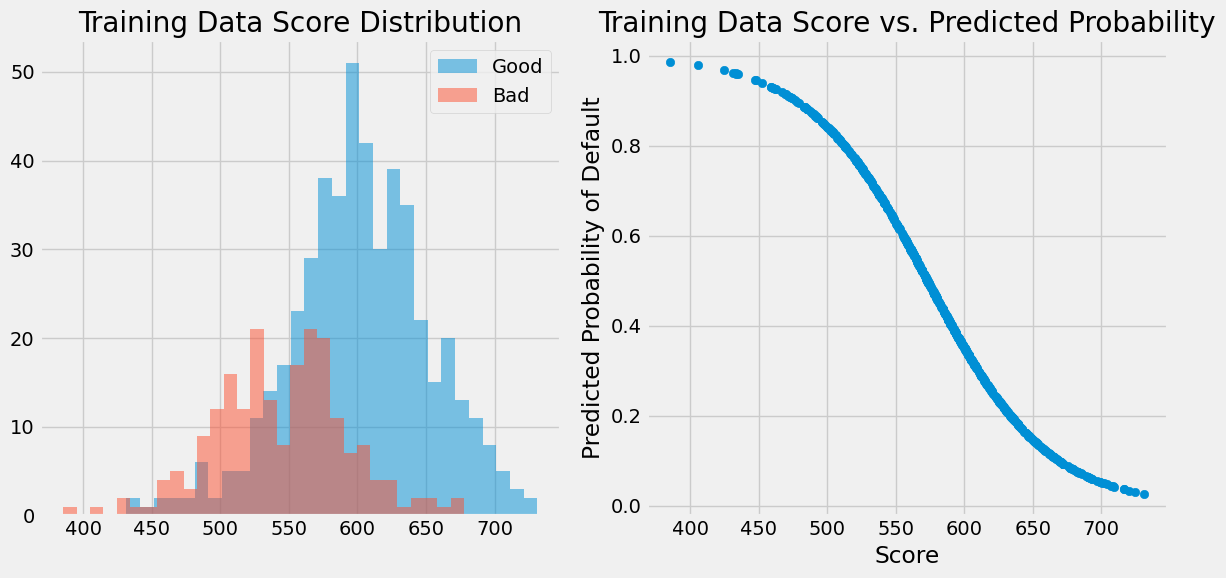

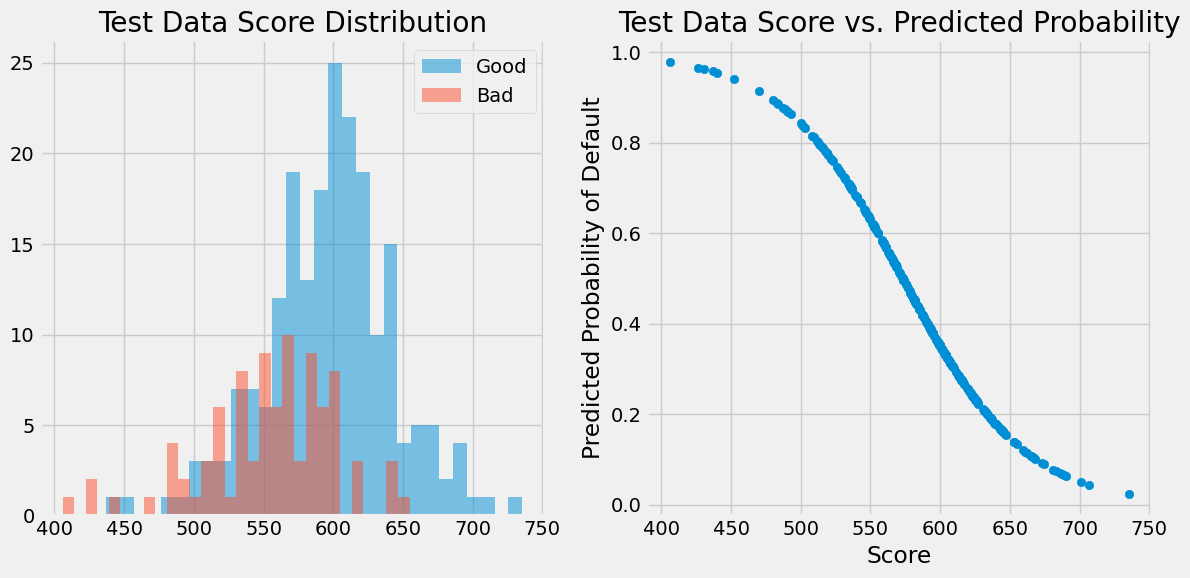

In [396]:
# Fit the scorecard on the training dataset
scorecard.fit(X_train, y_train)

# Compute scores for both train and test datasets
train_score = scorecard.score(X_train)
test_score = scorecard.score(X_test)

# Compute predicted probabilities for both train and test datasets
train_pred_proba = scorecard.predict_proba(X_train)
test_pred_proba = scorecard.predict_proba(X_test)

# Visualizations for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_score[y_train == 0], alpha=0.5, label="Good", bins=30)
plt.hist(train_score[y_train == 1], alpha=0.5, label="Bad", bins=30)
plt.title("Training Data Score Distribution")
plt.legend()

# Scatter plot for training data
plt.subplot(1, 2, 2)
plt.scatter(train_score, train_pred_proba[:, 1])
plt.title("Training Data Score vs. Predicted Probability")
plt.xlabel("Score")
plt.ylabel("Predicted Probability of Default")
plt.tight_layout()
plt.show()

# Visualizations for test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(test_score[y_test == 0], alpha=0.5, label="Good", bins=30)
plt.hist(test_score[y_test == 1], alpha=0.5, label="Bad", bins=30)
plt.title("Test Data Score Distribution")
plt.legend()

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(test_score, test_pred_proba[:, 1])
plt.title("Test Data Score vs. Predicted Probability")
plt.xlabel("Score")
plt.ylabel("Predicted Probability of Default")
plt.tight_layout()
plt.show()

**Test Data Score Distribution**
- **Explanation**: 
    - This histogram shows the distribution of credit scores for the test data, with a breakdown of 'Good' (blue) and 'Bad' (red) customers.

    - **Good Customers (Blue)**: These are the customers classified as non-defaulters, and most of them have scores concentrated in the range of 550 to 700.

    - **Bad Customers (Red)**: These are the customers classified as defaulters. Their scores are primarily concentrated between 450 and 600.
    - There is some overlap between the score distributions of good and bad customers, which indicates some misclassification between defaulters and non-defaulters in this score range.

- **Business Context**: 
    - A high overlap suggests that more accurate classification in the score range of 500-600 is essential, as it might lead to rejecting good customers (false positives) or accepting bad customers (false negatives).

    - Proper score binning and threshold setting can enhance the risk-based decision-making process for loan approvals and reduce financial losses due to defaults.

 **Test Data Score vs. Predicted Probability of Default**
- **Explanation**: 
    - This plot shows the relationship between the credit score (x-axis) and the predicted probability of default (y-axis).
    - As expected, a higher score correlates with a lower predicted probability of default.

    - At low scores (below 500), the probability of default is very high (close to 1), while at high scores (above 650), the probability of default drops to nearly 0.

    - The curve follows a smooth sigmoid-like shape, indicating that the score-to-default probability mapping is calibrated well.

- **Business Context**: 
    - This plot is crucial for deciding the score thresholds for credit risk segmentation (e.g., what score represents a high-risk vs. low-risk customer).
    
    - By setting optimal cutoff points, the business can reduce the risk of default while maximizing customer acceptance. This is particularly important in sectors like lending or credit card issuance, where understanding the risk associated with a given score directly impacts profitability.

### <span style="color:blue;">**Model Performance and Business Impact Analysis**</span>


Metric : Train      | Test      
-------------------------------
roc_auc: 0.8        | 0.75      
pr_auc : 0.6        | 0.55      
gini   : 0.6        | 0.5       
ks     : 0.49       | 0.4       


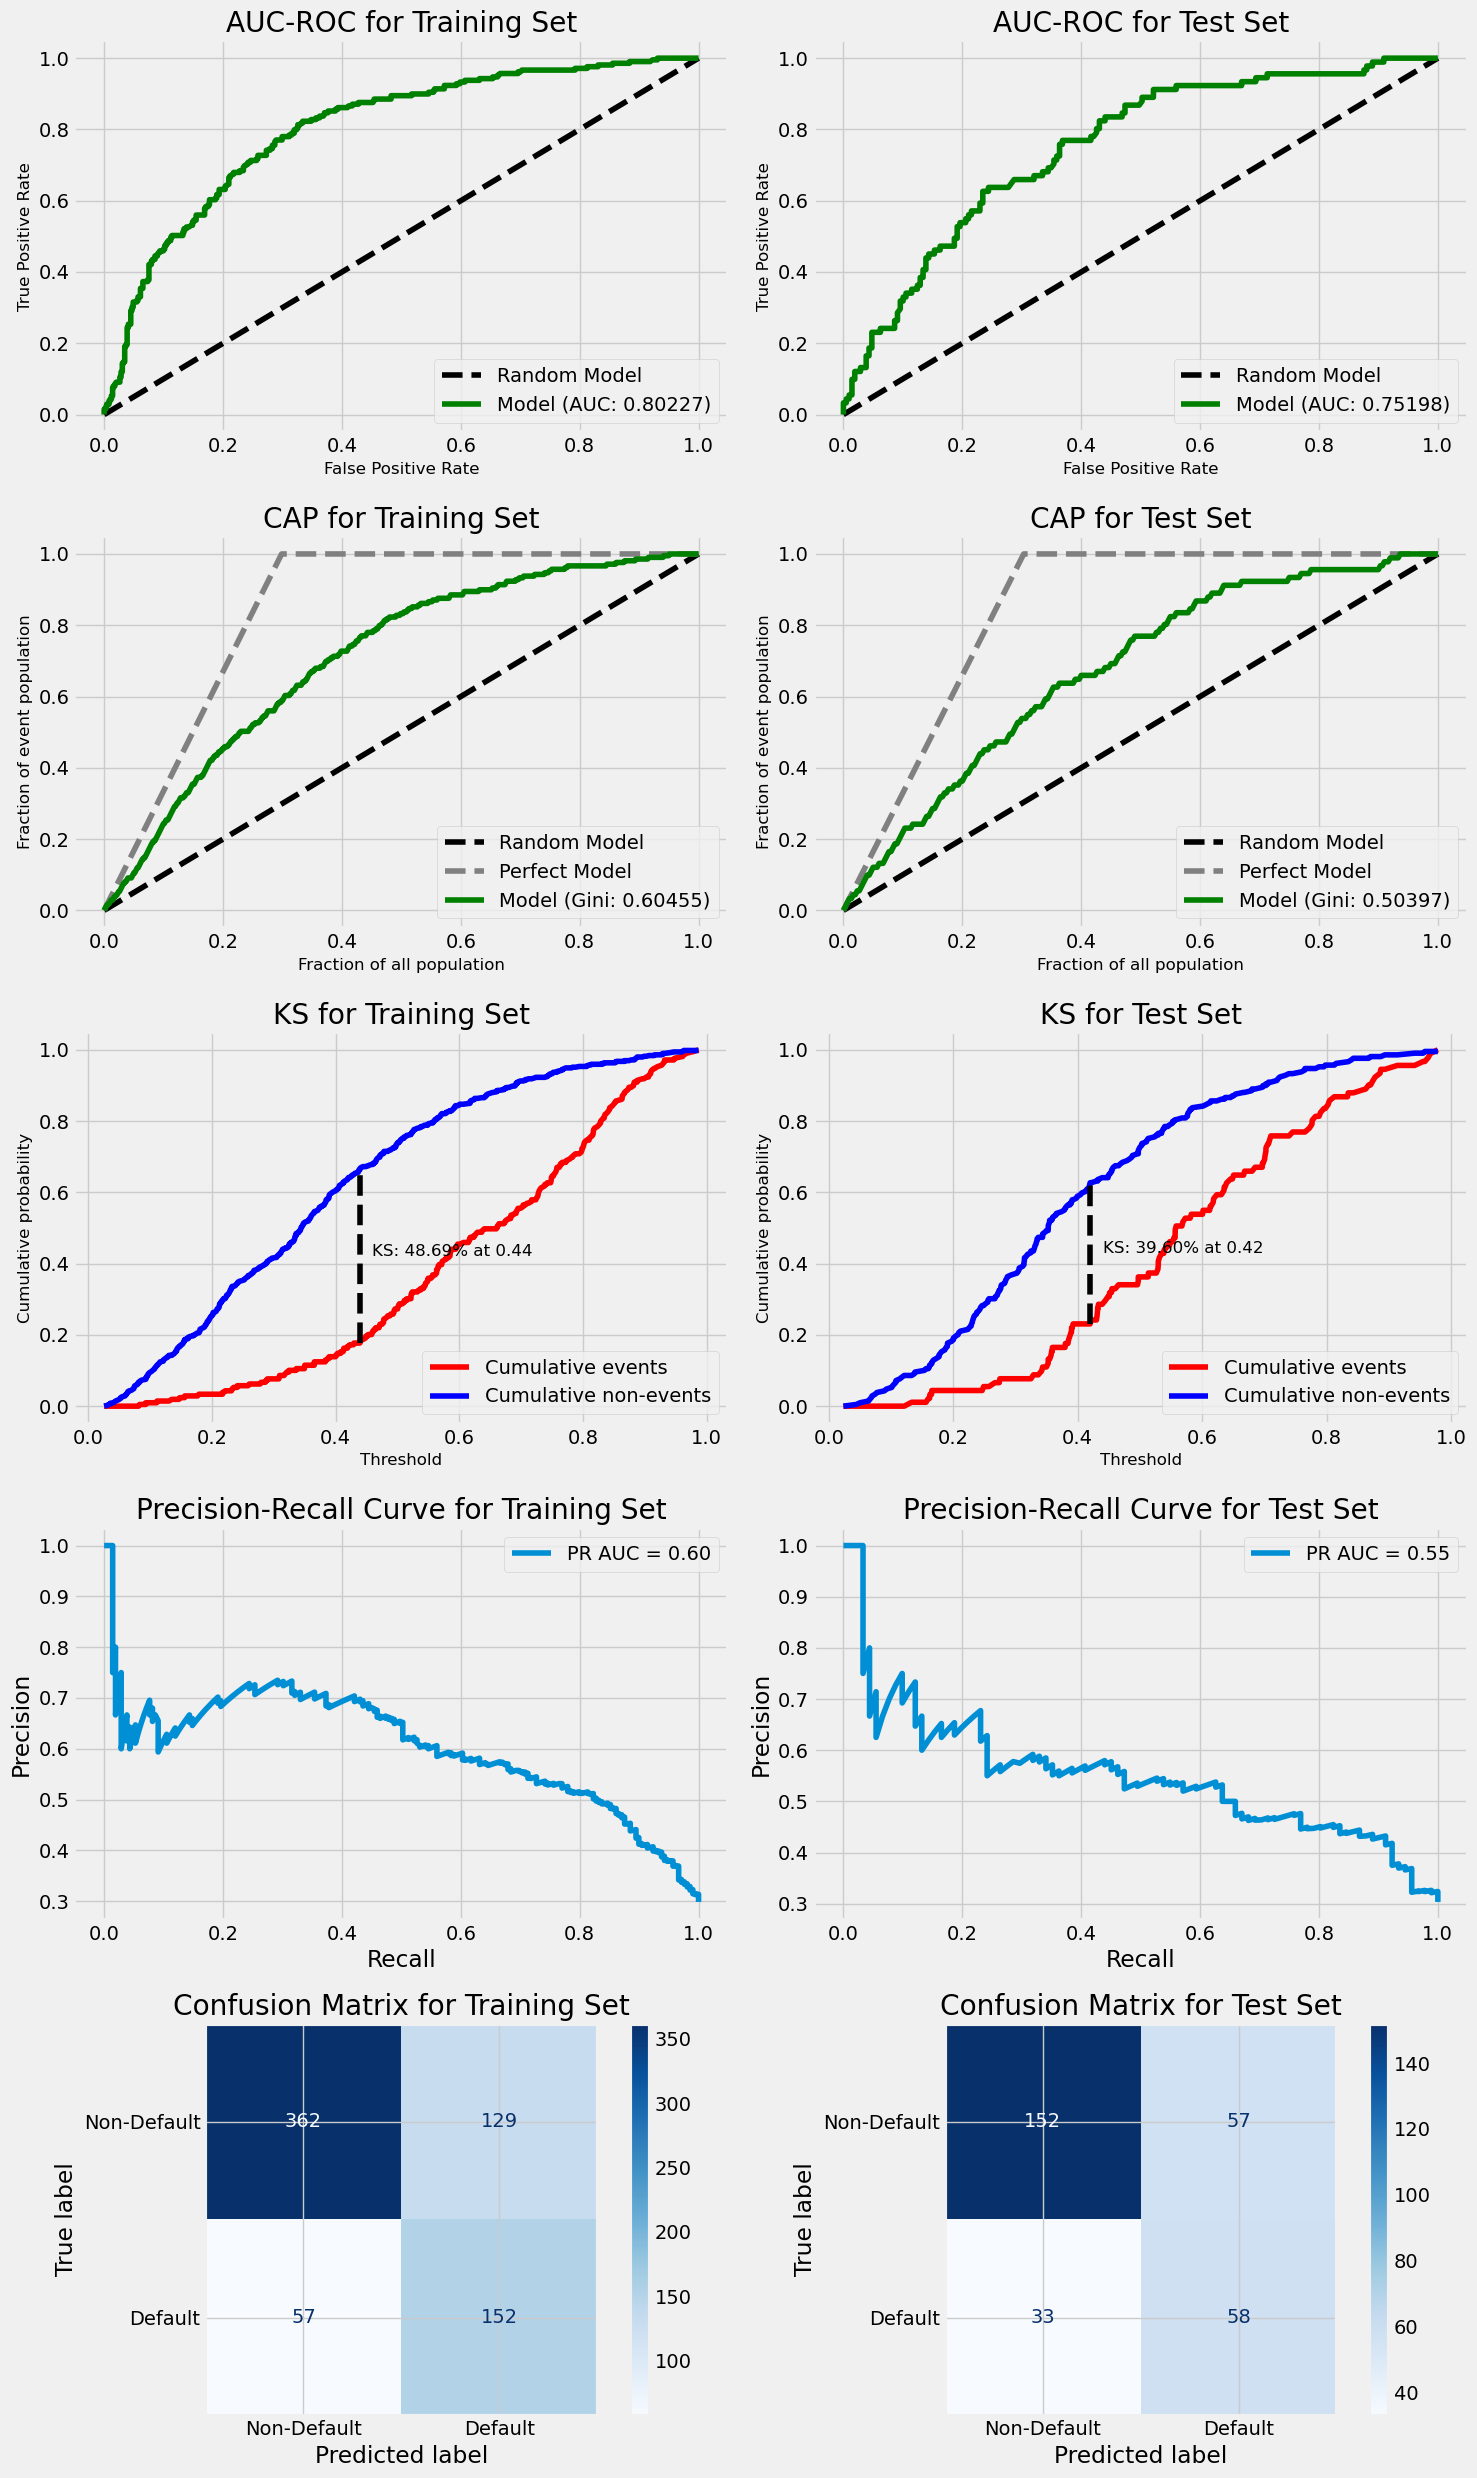

In [399]:
y_train_pred_proba = scorecard.predict_proba(X_train)[:, -1]
train_evaluation = {
    "roc_auc": roc_auc(y_train, y_train_pred_proba),
    "pr_auc": pr_auc(y_train, y_train_pred_proba),
    "gini": gini(y_train, y_train_pred_proba),
    "ks": ks(y_train, y_train_pred_proba),
}


y_test_pred_proba = scorecard.predict_proba(X_test)[:, -1]
test_evaluation = {
    "roc_auc": roc_auc(y_test, y_test_pred_proba),
    "pr_auc": pr_auc(y_test, y_test_pred_proba),
    "gini": gini(y_test, y_test_pred_proba),
    "ks": ks(y_test, y_test_pred_proba),
}
print_side_by_side(train_evaluation, test_evaluation)
plot_all_metrics(y_train, y_test, train_pred, test_pred, scorecard, X_train, X_test)


a. **AUC-ROC Curve (Training and Test Sets)**
- **Explanation**: The Area Under the Receiver Operating Characteristic (AUC-ROC) curve shows the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity) at various threshold settings.
- **Training Set AUC**: 0.80 indicates a good ability of the model to differentiate between `default` and `non-default` in the training data.
- **Test Set AUC**: 0.75, while slightly lower, still suggests that the model generalizes fairly well, but with potential room for improvement.
- **Business Context**: A higher AUC-ROC means better classification of customers into risk categories (i.e., who is likely to default), enabling more accurate credit decisions.

b. **CAP Curve (Training and Test Sets)**
- **Explanation**: The Cumulative Accuracy Profile (CAP) shows the proportion of actual defaults captured as you increase the proportion of the population targeted by the model. The closer the curve is to the perfect model (grey dashed line), the better.
- **Training Set Gini**: 0.60 shows a good level of separability.
- **Test Set Gini**: 0.50, a bit lower, reflects a decline in model performance on unseen data.
- **Business Context**: This shows how effectively the model identifies defaulters. The closer the curve is to the "perfect model," the better it helps prioritize high-risk customers for collections or further analysis.

c. **KS Statistic (Training and Test Sets)**
- **Explanation**: The Kolmogorov-Smirnov (KS) statistic compares the cumulative distribution of events (defaulters) and non-events (non-defaulters). It reflects the maximum difference between these two distributions.
- **Training Set KS**: 48.6% at a threshold of 0.44 indicates a good distinction between defaulters and non-defaulters in the training set.
- **Test Set KS**: 39.6% at a threshold of 0.42 indicates slightly weaker, but still reasonable, performance on the test set.
- **Business Context**: The KS statistic is critical for credit risk modeling as it indicates how well the model can separate defaulters from non-defaulters, supporting better decision-making regarding loan approvals or rejections.

d. **Precision-Recall Curve (Training and Test Sets)**
- **Explanation**: Precision-Recall curves are especially useful when dealing with imbalanced datasets. The curve helps to assess how well the model performs in predicting defaulters (positive class).
- **Training Set Precision-Recall AUC**: 0.60 indicates moderate performance.
- **Test Set Precision-Recall AUC**: 0.55 shows a decline in performance on unseen data.
- **Business Context**: A higher area under this curve indicates better identification of actual defaulters, which is crucial in minimizing financial loss by accurately predicting risky customers.

e. **Confusion Matrix (Training and Test Sets)**
- **Explanation**: The confusion matrix shows the actual vs. predicted classifications of customers into defaulters and non-defaulters.
- **Training Set**:
  - True Positives (Defaulters identified correctly): 152
  - True Negatives (Non-defaulters identified correctly): 362
  - False Positives (Non-defaulters predicted as defaulters): 129
  - False Negatives (Defaulters missed): 57
- **Test Set**:
  - True Positives: 58
  - True Negatives: 152
  - False Positives: 57
  - False Negatives: 33
- **Business Context**: This is critical for understanding the financial impact. For instance:
  - **False Positives** lead to rejecting good customers, which could result in lost business.
  - **False Negatives** mean that defaulters are misclassified as good customers, which could result in higher financial risk and default losses.


### <span style="color:blue;">**Model Calibration**</span>


Non-Calibrated Brier Score (Scorecard): 0.1990
Platt Scaling Brier Score: 0.1864
Isotonic Regression Brier Score: 0.1862


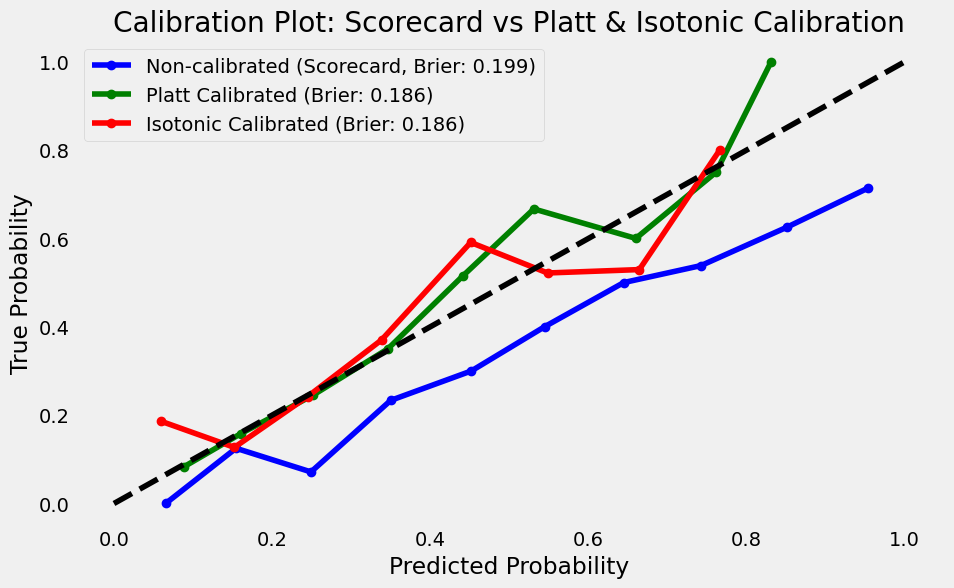

In [400]:
# Example of how to use the method
calibration_analysis(X_train, X_test, y_train, y_test, scorecard_model=scorecard)

### Explanation
- From the evaluation results it seems there"s no indication of overfitting which is good because the model performances are similar between training and testing set

- **The most important thins is the model calibration which is close to the perfect calibrated model**. Why is it so important? it ensures all business decision makers that the model estimated probabilities aligns with the actual default rate in the population of actual borrowers. For example, if the model is perfectly calibrated and the model predict that chance of someone default is 10% and the bank trust it. For every loan given to all borrowers with predicted probabilit of default 10%, then they expect on average that 10% of all borrowers will default.
- It is impossible that the model follow the perfectly callibrated line. If it does, it could be possible indication of an overfitting. 
- If the **point lies below the perfectly calibrated line** it means that **the model underpredicting the probability of "Bad" users**. Conversely, if a **point lies above the perfectly calibrated line** it means that **the model overpredicting the probability of the a "Bad" users**.

### <span style="color:blue;">**Model Explanation**</span>


In [403]:
intercept = scorecard.estimator_.intercept_
variables = scorecard.binning_process_.get_support(names=True)
coefs = scorecard.estimator_.coef_.reshape(-1)

print("Intercept(s): ", intercept)
print("Coef:")
for feature, coef in zip(variables, coefs):
    print("{} = {:.3f}".format(feature, coef))

Intercept(s):  [0.00222413]
Coef:
months_loan_duration = -0.491
credit_history = -0.933
purpose = -0.992
amount = -0.820
savings_balance = -0.772
savings_to_amount_ratio = -0.272
loan_duration_to_employment_length = -0.594


### Explanation
Explanation of parameters inside the Logistic Regression:
1. Intercept (`intercept_`): It"s the average chance of default when all other predictor variables are zero.
2. Coefficients (`coef_`): These numbers show how much each factor affects the chance of default:
    - Negative numbers mean the factor lowers the chance of default. For example, if weight of evidence person_income goes up, the chance of default goes down.
    - Positive numbers mean the factor increases the chance of default. For instance, if weight of evidence cb_person_default_on_file is "Yes", it increases the chance of default.

Based on these coefficients if the Weight of Evidence is positively big (high percentage of non default customers) the lower the change of default because it is multiploed by the negative coefficient. Otherwise if the Weight of Evidence is massively negative (high percentage of non customers) the higher the chance of default because massive negatice values multiplied by negative coefficients result in positive log of the odds which increase the probability of default in the final prediction.

## <span style="color:green;">**Section5: Scorecard Creation**</span>
Generate Scorecard Profile and prepare risk management report for Risk Managers. 
    
### <span style="color:darkorange;">1. Scorecard Model Loader</span>   
Load the model 

### <span style="color:darkorange;">2. Generate Scorecard profiler</span>   
- Score generation of entire dataset
- Define risk criteria and attach risk profile of each customer
- present the report for customer creditworthiness. 
    
### <span style="color:darkorange;">3. Generate Final Credit Report</span>   
Generate final report attaching preditions of all customers i.e. Risk and Credti Score.


### <span style="color:blue;">**Scorecard Model Loader**</span>


In [418]:
import pickle 
# Load model:
with open("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Final model/optbinning-scorecard-model_gini_50.pkl", "rb") as f:
    scorecard = pickle.load(f)
    display(scorecard)

Scorecard(binning_process=BinningProcess(categorical_variables=['credit_history',
                                                                'purpose',
                                                                'personal_status',
                                                                'other_debtors',
                                                                'property',
                                                                'installment_plan',
                                                                'housing',
                                                                'foreign_worker',
                                                                'job',
                                                                'gender'],
                                         max_n_bins=8, min_n_bins=2,
                                         selection_criteria={'gini': {'min': 0.02},
                                                             'iv': {'max': 0.5,
                                                                    'min': 0.02,
                                                                    'strategy': 'highest',
                                                                    'top': 9},
                                                             'quality_score': {'min': 0.01}}...
                                                         'installment_rate_amount',
                                                         'savings_to_amount_ratio',
                                                         'loan_duration_to_employment_length',
                                                         'existing_credits_to_age',
                                                         'amount_to_years_at_residence',
                                                         'loan_duration_to_years_at_residence',
                                                         'years_at_residence_per_month_of_loan_duration']),
          estimator=LogisticRegression(class_weight='balanced'),
          scaling_method='min_max',
          scaling_method_params={'max': 800, 'min': 350}, verbose=True)


### <span style="color:blue;">**2. Generate Scorecard Profiler**</span>

Credit scorecard will show how the Points represented by the bins generated from the predictor variable. Generating the score points will involve scaling calculations from the logistic regression parameters and WoE(s) from grouped attributes inside each characteristics. In general the relationship between the scores and odds can be presented and linear equation:
$$ \text{Score} = Offset + (Factor * \ln{(Odds)}) $$

The scorecard is being developed using a **specified odds** and **points to double the odds** (*pdo*). The $ Offset $ and $ Factor $ can be calculated by using these formula:
$$ \text{Score} = Offset + (Factor * \ln{(Odds)}) $$
$$ \text{Score} + \text{pdo} = Offset + (Factor * \ln{(2 * Odds)}) $$

By solving the equation above for getting pdo, we get:
$$ \text{pdo} = Factor * \ln{(2)} \text{, therefore } Factor = \text{pdo} / \ln{(2)} $$
$$ \text{Offset} = Score - {Factor * \ln(Odds)}$$

After calculating, Factor and Offset we can start using the same formula for calculate the total score. The difference is we replace the $ \ln{(Odds)} $ with the linear equation from the logistic regression. 
$$ \text{Score} = Offset + Factor * \ln{(Odds)} = $$
$$ \text{Score} = - (\sum_{j,i=1}^{k,n}(WoE_{j}*\beta_{i})+a) * Factor + Offset  $$
$$ \text{Score} = - (\sum_{j,i=1}^{k,n}(WoE_{j}*\beta_{i}+\frac{a}{n})) * Factor + Offset  $$
$$ \text{Score} = \sum_{j,i=1}^{k,n}(-(WoE_{j}*\beta_{i}+\frac{a}{n}) * Factor + \frac{Offset}{n})  $$

We can modify the final equation to calculate the score for each grouped attribute inside each characteristic by removing the sum because we only wanted to calculate a single attribute score.
$$ \text{Attribute Score} = -(WoE_{j}*\beta_{i}+\frac{a}{n}) * Factor + \frac{Offset}{n}  $$

Where:
- $ WOE $ = weight of evidence for each grouped attribute
- $ \beta $ = regression coefficient for each characteristic
- $ a $ = intercept term from logistic regression
- $ n $ = number of characteristics
- $ k $ = number of groups (of attributes) in each characteristic

Source: https://www.amazon.com/Credit-Risk-Scorecards-Implementing-Intelligent/dp/047175451X



In [405]:
# Show scorecard table:
scorecard_table = scorecard.table(style="summary").reset_index(drop=True)
scorecard_table.to_csv("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/reports/credit_scorecard_points.csv", index=False)

In [406]:
scorecard_table

,Variable,Bin,Points
0,months_loan_duration,"(-inf, 7.50)",108.088961
1,months_loan_duration,"[7.50, 11.50)",89.952727
2,months_loan_duration,"[11.50, 17.00)",86.935371
3,months_loan_duration,"[17.00, 26.50)",82.445206
4,months_loan_duration,"[26.50, 33.00)",80.753008
5,months_loan_duration,"[33.00, 43.50)",68.883831
6,months_loan_duration,"[43.50, inf)",57.665804
7,months_loan_duration,Special,81.860993
8,months_loan_duration,Missing,81.860993
9,credit_history,[critical],117.136659


In [407]:
# Point allocation checking:
for variable in scorecard_table["Variable"].unique():
    mask = scorecard_table["Variable"] == variable
    display(variable, scorecard_table[mask])

'months_loan_duration'

,Variable,Bin,Points
0,months_loan_duration,"(-inf, 7.50)",108.088961
1,months_loan_duration,"[7.50, 11.50)",89.952727
2,months_loan_duration,"[11.50, 17.00)",86.935371
3,months_loan_duration,"[17.00, 26.50)",82.445206
4,months_loan_duration,"[26.50, 33.00)",80.753008
5,months_loan_duration,"[33.00, 43.50)",68.883831
6,months_loan_duration,"[43.50, inf)",57.665804
7,months_loan_duration,Special,81.860993
8,months_loan_duration,Missing,81.860993


'credit_history'

,Variable,Bin,Points
9,credit_history,[critical],117.136659
10,credit_history,[delayed],86.157552
11,credit_history,[repaid],75.315973
12,credit_history,"[fully repaid this bank, fully repaid]",31.149634
13,credit_history,Special,81.860993
14,credit_history,Missing,81.860993


'purpose'

,Variable,Bin,Points
15,purpose,"[retraining, car (used)]",111.987314
16,purpose,[radio/tv],104.081874
17,purpose,"[furniture, repairs]",85.003536
18,purpose,[business],65.246613
19,purpose,"[car (new), domestic appliances]",63.059992
20,purpose,"[education, others]",44.916773
21,purpose,Special,81.860993
22,purpose,Missing,81.860993


'amount'

,Variable,Bin,Points
23,amount,"(-inf, 1387.00)",77.317694
24,amount,"[1387.00, 3554.00)",94.953252
25,amount,"[3554.00, 3913.50)",138.129247
26,amount,"[3913.50, 7839.50)",72.424395
27,amount,"[7839.50, inf)",42.041479
28,amount,Special,81.860993
29,amount,Missing,81.860993


'savings_balance'

,Variable,Bin,Points
30,savings_balance,"(-inf, 17.50)",83.660309
31,savings_balance,"[17.50, 44.50)",66.517606
32,savings_balance,"[44.50, 55.50)",47.635847
33,savings_balance,"[55.50, 90.50)",77.095846
34,savings_balance,"[90.50, 480.50)",82.772971
35,savings_balance,"[480.50, 814.00)",98.211048
36,savings_balance,"[814.00, inf)",122.403419
37,savings_balance,Special,81.860993
38,savings_balance,Missing,81.860993


'savings_to_amount_ratio'

,Variable,Bin,Points
39,savings_to_amount_ratio,"(-inf, 0.00)",69.807556
40,savings_to_amount_ratio,"[0.00, 0.01)",75.833686
41,savings_to_amount_ratio,"[0.01, 0.05)",80.625982
42,savings_to_amount_ratio,"[0.05, 0.09)",82.472762
43,savings_to_amount_ratio,"[0.09, 0.18)",86.587536
44,savings_to_amount_ratio,"[0.18, 0.98)",87.562574
45,savings_to_amount_ratio,"[0.98, inf)",101.196178
46,savings_to_amount_ratio,Special,81.860993
47,savings_to_amount_ratio,Missing,81.860993


'loan_duration_to_employment_length'

,Variable,Bin,Points
48,loan_duration_to_employment_length,"(-inf, 1.27)",101.058223
49,loan_duration_to_employment_length,"[1.27, 2.43)",94.304336
50,loan_duration_to_employment_length,"[2.43, 3.40)",88.662432
51,loan_duration_to_employment_length,"[3.40, 4.35)",85.673467
52,loan_duration_to_employment_length,"[4.35, 12.26)",78.138316
53,loan_duration_to_employment_length,"[12.26, inf)",56.782909
54,loan_duration_to_employment_length,Special,81.860993
55,loan_duration_to_employment_length,Missing,81.860993



### <span style="color:blue;">**3. Generate Final Credit Profile**</span>


In [408]:
X_test.shape

(300, 27)

In [409]:
X = ds.drop(columns=['default'])  # Exclude target variable
y = ds['default']  # Use the encoded target variable

# Prepare input data
input_df = X.copy()

# Add the target variable to the input DataFrame
input_df['default'] = y  # Assuming `y` is your target variable

# Calculate the FICO score using the scorecard
credit_scores_df = pd.DataFrame({
    "credit_score": scorecard.score(input_df).round()
})

# Interpret the FICO score
credit_scores_df = get_credit_levels(credit_scores_df, target_col="credit_score")
credit_scores_df["credit_description"] = credit_scores_df["credit_level"].map(credit_levels_decriptions)
credit_scores_df["loan_status"] = input_df['default'].values  # Use the loan status from the combined DataFrame

# Optionally, you can reset the index for better presentation
credit_scores_df.reset_index(drop=True, inplace=True)


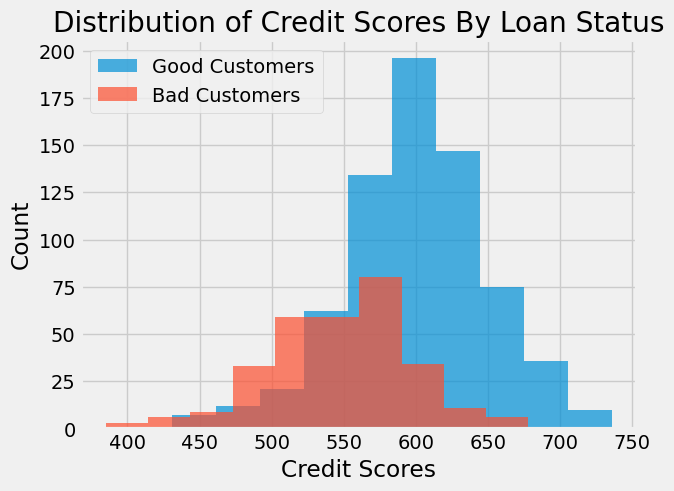

In [410]:
credit_scores_df.loc[credit_scores_df["loan_status"]==0, "credit_score"].hist(alpha=0.7, label="Good Customers")
credit_scores_df.loc[credit_scores_df["loan_status"]==1, "credit_score"].hist(alpha=0.7, label="Bad Customers")
plt.title("Distribution of Credit Scores By Loan Status")
plt.xlabel("Credit Scores")
plt.ylabel("Count")
plt.legend()
plt.savefig("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/Plots/distribution_of_credit_scores_by_loan_status.png", bbox_inches = "tight")
plt.show()

In [411]:
# Create report to management
# Prepare columns that will be used for reporting
report_df = credit_scores_df[["credit_score", "credit_level", "credit_lower_bound", "credit_upper_bound", "credit_description", "loan_status"]]

# Count every Good Users and Bad Users in each FICO credit levels
report_agg_df = report_df\
    .groupby(["credit_level", "credit_lower_bound", "credit_upper_bound", "credit_description"])["loan_status"]\
    .value_counts()\
    .unstack()\
    .reset_index()\
    .rename(columns={
        0: "Good Customers",
        1: "Bad Customers",
        "credit_level": "Credit Level",
        "credit_lower_bound": "Credit Lower Bound", 
        "credit_upper_bound": "Credit Upper Bound", 
        "credit_description": "Credit Description"
    })\
    .fillna(0)


report_agg_df = report_agg_df.rename_axis(None, axis=1)
report_agg_df["Customers"] = report_agg_df["Good Customers"] + report_agg_df["Bad Customers"]

# Proportion of customers exists in each credit levels
report_agg_df["Customers Rate"] = report_agg_df["Customers"] / report_agg_df["Customers"].sum() * 100
# Proportion of `Bad Customers`` in each credit levels

report_agg_df["Default Rate"] = report_agg_df["Bad Customers"] / report_agg_df["Customers"] * 100
report_agg_df["Reverse Cumulative Customers"] = report_agg_df["Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Good Customers"] = report_agg_df["Good Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Bad Customers"] = report_agg_df["Bad Customers"][::-1].cumsum()

# Calculate the cumulative percentage of `Good Customers` covered from all customers (start at level 8 down to level 1)
report_agg_df["Good Customers Coverage"] = report_agg_df["Reverse Cumulative Good Customers"] / report_agg_df["Good Customers"].sum()
# Calculate the cumulative percentage of `Bad Customers` covered from all customers (start at level 8 down to level 1)
report_agg_df["Loss Coverage"] = report_agg_df["Reverse Cumulative Bad Customers"] / report_agg_df["Reverse Cumulative Customers"]

In [412]:
report_agg_df = report_agg_df[[
    "Credit Level", "Credit Lower Bound", 
    "Credit Upper Bound", "Credit Description",
    "Customers", "Customers Rate", 
    "Good Customers", "Bad Customers", 
    "Default Rate", "Good Customers Coverage", 
    "Loss Coverage"
]]
report_agg_df

,Credit Level,Credit Lower Bound,Credit Upper Bound,Credit Description,Customers,Customers Rate,Good Customers,Bad Customers,Default Rate,Good Customers Coverage,Loss Coverage
0,2,350.0,400.0,Poor,1.0,0.1,0.0,1.0,100.000000,1.000000,0.300000
1,3,400.0,450.0,Below Average,13.0,1.3,4.0,9.0,69.230769,1.000000,0.299299
2,4,450.0,500.0,Average,55.0,5.5,18.0,37.0,67.272727,0.994286,0.294118
3,5,500.0,550.0,Above Average,171.0,17.1,73.0,98.0,57.309942,0.968571,0.271751
4,6,550.0,600.0,Good,373.0,37.3,250.0,123.0,32.975871,0.864286,0.203947
5,7,600.0,650.0,Very Good,280.0,28.0,253.0,27.0,9.642857,0.507143,0.082687
6,8,650.0,700.0,Excellent,94.0,9.4,89.0,5.0,5.319149,0.145714,0.046729
7,9,700.0,inf,Exceptional,13.0,1.3,13.0,0.0,0.000000,0.018571,0.000000


In [413]:
report_agg_df.to_csv("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/reports/coverage_table.csv", index=False)


### Explanation
This report table is a summary of credit level statistics based on the count of Good Customer and Bad Customers inside each credit level.

1. **Credit Level**: This column indicates the different levels of creditworthiness.

2. **Credit Lower** Bound and Credit Upper Bound: These columns define the score ranges for each credit level. For example, the "Very Poor" credit level ranges from negative infinity (or the lowest possible score) up to 350.

3. **Credit Description**: This column provides a description or label for each credit level.

4. **Customers**: The number of customers or individuals falling within each credit level.

5. **Customers Rate**: This column might represent the percentage of customers in each credit level relative to the total number of customers.

6. **Good Customers and Bad Customers**: The number of customers within each credit level who are classified as "Good" (low credit risk) or "Bad" (high credit risk).

7. **Default Rate**: This column indicates the percentage of customers within each credit level who have defaulted on their obligations.

8. **Good Customers Coverage**: Cumulative percentage of "Good" customers covered within each credit level start from the highest credit level.

9. **Loss Coverage**: cumulative percentage of exposed losses that we are willing to accept for a given loan, starting from a certain credit level until the highes credit level.

In [414]:
# Prepare input data (features only)
input_df = X.copy()

# Calculate the score using the scorecard
credit_scores = scorecard.score(input_df).round()

# Create a DataFrame for credit scores
credit_scores_df = pd.DataFrame({
    "credit_score": credit_scores
})

# Extract the default column from the original DataFrame
default_col = ds[['default']]

# Merge the credit scores and the default column back to the original DataFrame
final_df = pd.concat([ds.reset_index(drop=True), credit_scores_df], axis=1)

# If you want to ensure that the 'default' column is included:
final_df['default'] = default_col.reset_index(drop=True)

final_df.head(50)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,other_debtors,property,...,employment_length_years,residence_history_years,installment_rate_amount,savings_to_amount_ratio,loan_duration_to_employment_length,existing_credits_to_age,amount_to_years_at_residence,loan_duration_to_years_at_residence,years_at_residence_per_month_of_loan_duration,credit_score
0,-43.000000,6,critical,radio/tv,1169,781.570379,4,single,none,real estate,...,13.000000,6.000000,4676,0.668009,0.428571,0.029412,167.000000,0.857143,4.000000,693.0
1,75.000000,48,repaid,radio/tv,5951,89.000000,2,Unknown,none,real estate,...,2.000000,0.416667,11902,0.014953,16.000000,0.043478,4200.705882,33.882353,0.083333,524.0
2,97.245875,12,critical,education,2096,24.000000,2,single,none,real estate,...,5.000000,4.000000,4192,0.011445,2.000000,0.020000,419.200000,2.400000,2.000000,585.0
3,-32.000000,42,repaid,furniture,7882,9.000000,2,single,guarantor,building society savings,...,5.000000,13.000000,15764,0.001142,7.000000,0.021739,563.000000,3.000000,2.888889,503.0
4,-23.000000,24,delayed,car (new),4870,43.000000,3,single,none,unknown/none,...,3.000000,13.000000,14610,0.008828,6.000000,0.037037,347.857143,1.714286,4.333333,525.0
5,97.245875,36,repaid,education,9055,781.570379,2,single,none,unknown/none,...,2.000000,8.000000,18110,0.086304,12.000000,0.027778,1006.111111,4.000000,2.000000,490.0
6,97.245875,24,repaid,furniture,2835,761.000000,3,single,none,building society savings,...,11.000000,12.000000,8505,0.268336,2.000000,0.018519,218.076923,1.846154,4.000000,618.0
7,169.000000,36,repaid,car (used),6948,57.000000,2,single,none,other,...,2.000000,0.250000,13896,0.008203,12.000000,0.027778,5558.400000,28.800000,0.062500,560.0
8,97.245875,12,repaid,radio/tv,3059,18426.000000,2,divorced,none,real estate,...,4.000000,24.000000,6118,6.021569,2.400000,0.016129,122.360000,0.480000,12.000000,679.0
9,13.000000,30,critical,car (new),5234,52.000000,4,married,none,other,...,3.000000,0.833333,20936,0.009933,7.500000,0.068966,2854.909091,16.363636,0.238095,535.0


In [415]:
final_df.to_excel("/Users/macbookpro/Documents/Applications/Fairmoney/Credit Scoring Model/reports/final credit report with creditscores.xlsx")